<img align="right" width="400" src="https://drive.google.com/thumbnail?id=1rPeHEqFWHJcauZlU82a4hXM10TUjmHxM&sz=s4000" alt="FHNW Logo">


# Sentiment Classification with LLMs (of Doctor Reviews)

by Fabian Märki

## Summary
The aim of this notebook is to showcase how to build a prompt for sentiment classification using a LLM (of your choice). It also showcases that it can be tricky to come up with a "good" prompt even for such a simple task and that the runtime (and with this also CO2 emissions) increase drastically compared to a simple classifier (e.g. using SVM with TF-IDF).

This notebook contains assigments: <font color='red'>Questions are written in red.</font>

<a href="https://colab.research.google.com/github/markif/NLP_LAB_CAS/blob/master/Sentiment_Classification_of_Doctor_Reviews_with_LLMs.ipynb">
  <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [14]:
%%capture

!pip install 'fhnw-nlp-utils>=0.11.0,<0.12.0'

In [2]:
#OLLAMA_HOST='https://XYZ.trycloudflare.com'
OLLAMA_HOST='http://localhost:11434'

# try the smallest model (let's hope for some speedup and that it is sufficient for this simple task)
MODEL_TEXT = "qwen3:0.6b"

# ensure (in your environment) that the model is installed
#
# !ollama pull qwen3:0.6b
# docker exec -it ollama sh -c "ollama pull qwen3:0.6b"

Let's use Ollama's client this time.

In [3]:
%%capture

!pip install ollama

In [4]:
from ollama import Client

client = Client(
    host = OLLAMA_HOST
)

In [5]:
def predict_sensitivity_en(text):
    
    return client.chat(
        model = MODEL_TEXT, 
        messages = [
            {
                "role": "system",
                "content": "You are a helpful assistant."
            },
            {
                "role": "user",
                "content": f"What is the sentiment of the following review: '{text}'"
            }
        ])

In [6]:
%%time

text_pos = "Der Arzt war sehr freundlich und kompetent. Die Wartezeit war kurz."

response_pos = predict_sensitivity_en(text_pos)
print(response_pos, "\n\n")

text_neg = "Der Arzt war sehr unfreundlich und unkompetent. Die Wartezeit war lang."

response_neg = predict_sensitivity_en(text_neg)
print(response_neg, "\n\n")

model='qwen3:0.6b' created_at='2025-05-30T12:35:10.932949063Z' done=True done_reason='stop' total_duration=3349551877 load_duration=1239653739 prompt_eval_count=48 prompt_eval_duration=236146988 eval_count=285 eval_duration=1865818464 message=Message(role='assistant', content='<think>\nOkay, let\'s see. The user wants to know the sentiment of the review: "Der Arzt war sehr freundlich und kompetent. Die Wartezeit war kurz." \n\nFirst, I need to break down the review into two sentences. The first part says the doctor was very friendly and competent. The second part mentions the wait time was short. \n\nNow, sentiment analysis. Sentiment here refers to the overall tone or emotion. Let\'s look at each part. The doctor being friendly and competent sounds positive. Then, the wait time being short is a positive aspect too. Both parts are positive. \n\nI should check if there\'s any negative or neutral part. There\'s no mention of problems or negatives here. Both sentences are good and positiv

<font color='red'>**TASK: Improve above prompt so that it outputs only one word being either `positive` or `negative`. Think about better instructions (e.g. more precise), possible additional [parameters](https://github.com/ollama/ollama/blob/main/docs/api.md#parameters) or maybe even different [models](https://ollama.com/search) or [model sizes](https://ollama.com/library/qwen3).**</font>

Links that might be helpful:

- [LLM settings](https://www.promptingguide.ai/de/introduction/settings)
- [Elements of a Prompt](https://www.promptingguide.ai/de/introduction/elements)
- [General Prompting Guidelines](https://www.promptingguide.ai/de/introduction/tips)
- [Enable/disable thinking](https://github.com/ollama/ollama-python/blob/main/examples/thinking.py) in Ollama's client

In [7]:
from ollama import Client

MODEL_TEXT = ...

client = Client(
    host = OLLAMA_HOST
)

def predict_sensitivity(text):
    
    response = client.chat(
        ...
    )
    
    return ...

In [8]:
%%time

text_pos = "Der Arzt war sehr freundlich und kompetent. Die Wartezeit war kurz."

response_pos = predict_sensitivity(text_pos)
print(response_pos, "\n\n")

text_neg = "Der Arzt war sehr unfreundlich und unkompetent. Die Wartezeit war lang."

response_neg = predict_sensitivity(text_neg)
print(response_neg, "\n\n")

positive 


negative 


CPU times: user 4.38 ms, sys: 1.05 ms, total: 5.43 ms
Wall time: 1.81 s


Let's get a "feeling" how good this works on our doctor reviews...

In [9]:
from fhnw.nlp.utils.storage import load_dataframe
from fhnw.nlp.utils.storage import download

download("https://drive.switch.ch/index.php/s/0hE8wO4FbfGIJld/download", "data/german_doctor_reviews_tokenized.parq")
data = load_dataframe("data/german_doctor_reviews_tokenized.parq")

# remove all neutral sentimens
data = data.loc[(data["label"] != "neutral")]
data.shape

(331197, 9)

In [10]:
data.head(3)

,text_original,rating,text,label,sentiment,token_clean,text_clean,token_stem,token_clean_stopwords
0,Ich bin franzose und bin seit ein paar Wochen ...,2.0,Ich bin franzose und bin seit ein paar Wochen ...,positive,1,"[ich, bin, franzose, und, bin, seit, ein, paar...",ich bin franzose und bin seit ein paar wochen ...,"[franzos, seit, paar, woch, muench, zahn, schm...","[franzose, seit, paar, wochen, muenchen, zahn,..."
1,Dieser Arzt ist das unmöglichste was mir in me...,6.0,Dieser Arzt ist das unmöglichste was mir in me...,negative,-1,"[dieser, arzt, ist, das, unmöglichste, was, mi...",dieser arzt ist das unmöglichste was mir in me...,"[arzt, unmog, leb, je, begegnet, unfreund, her...","[arzt, unmöglichste, leben, je, begegnet, unfr..."
2,Hatte akute Beschwerden am Rücken. Herr Magura...,1.0,Hatte akute Beschwerden am Rücken. Herr Magura...,positive,1,"[hatte, akute, beschwerden, am, rücken, ., her...",hatte akute beschwerden am rücken . herr magur...,"[akut, beschwerd, ruck, magura, erst, arzt, wi...","[akute, beschwerden, rücken, magura, erste, ar..."


In [11]:
%%time

for index, row in data[:50].iterrows():
    result = predict_sensitivity(row["text_clean"])
    print(index, result, row["label"])

0 positive positive
1 negative negative
2 positive positive
3 positive positive
4 positive positive
5 positive positive
6 positive positive
7 positive positive
8 positive positive
9 positive positive
10 negative positive
11 positive positive
12 positive positive
13 negative negative
14 positive positive
15 positive positive
16 positive positive
17 positive positive
18 positive positive
19 negative negative
20 positive positive
21 positive positive
22 negative negative
23 positive positive
24 positive positive
25 positive positive
26 positive positive
27 positive positive
28 positive positive
29 positive positive
30 positive positive
31 negative negative
32 positive positive
33 positive positive
34 positive positive
35 positive positive
36 positive positive
37 positive positive
38 positive positive
39 positive positive
40 positive positive
41 positive positive
43 positive positive
44 positive positive
45 negative negative
46 positive positive
47 positive positive
48 positive positive
49

### Some Considerations

In total it would take about (7.96s / 50 * 331187 / (60 * 60)) ~14.6 hours to classify the complete dataset.

In this respect, it might be worth the consideration to train a "simple" classifier (as we did in an earlier notebook) given training data is available. This results in way less waiting time (and CO2 emissions).

Here is the code to predict the sensitivity for the test dataset (should "only" take about 2.9 hours)...

In [12]:
from fhnw.nlp.utils.params import get_train_test_split

data_train, data_test = get_train_test_split({}, data)
data_train, data_val = get_train_test_split({}, data_train)

In [13]:
data_test.shape

(66240, 9)

In [17]:
%%time
from datetime import datetime

every_n_elements = 1000
predictions = []
count = 0

for index, row in data_test.iterrows():
    prediction = predict_sensitivity(row["text_clean"])
    predictions.append(prediction)

    count+=1

    if count % every_n_elements == 0:
        print(datetime.now().time(), "prediction:", prediction, "label:", row["label"], "total predictions", len(predictions), "of", data_test.shape[0])

18:18:25.889825 prediction: positive label: positive total predictions 1000 of 66238
18:22:33.939356 prediction: positive label: positive total predictions 2000 of 66238
18:26:45.578507 prediction: positive label: positive total predictions 3000 of 66238
18:30:54.351001 prediction: positive label: positive total predictions 4000 of 66238
18:35:07.541708 prediction: positive label: positive total predictions 5000 of 66238
18:39:15.693960 prediction: positive label: positive total predictions 6000 of 66238
18:43:23.938780 prediction: positive label: positive total predictions 7000 of 66238
18:47:34.442752 prediction: negative label: negative total predictions 8000 of 66238
18:51:43.241336 prediction: positive label: positive total predictions 9000 of 66238
18:55:50.850350 prediction: positive label: positive total predictions 10000 of 66238
18:59:59.676031 prediction: positive label: positive total predictions 11000 of 66238
19:04:06.585307 prediction: positive label: positive total pred

Set Population: 66238
Accuracy: 0.9811


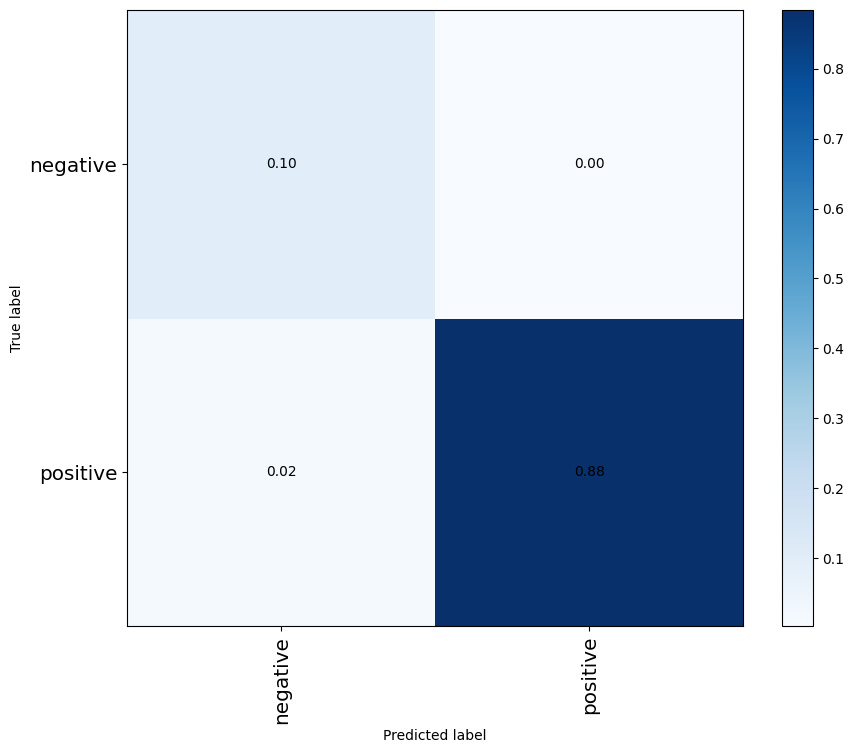

              precision    recall  f1-score   support

    negative       0.86      0.97      0.91      6604
    positive       1.00      0.98      0.99     59634

    accuracy                           0.98     66238
   macro avg       0.93      0.98      0.95     66238
weighted avg       0.98      0.98      0.98     66238



In [18]:
from fhnw.nlp.utils.ploting import report_classification_results

report_classification_results({}, data_test["label"].to_list(), predictions)

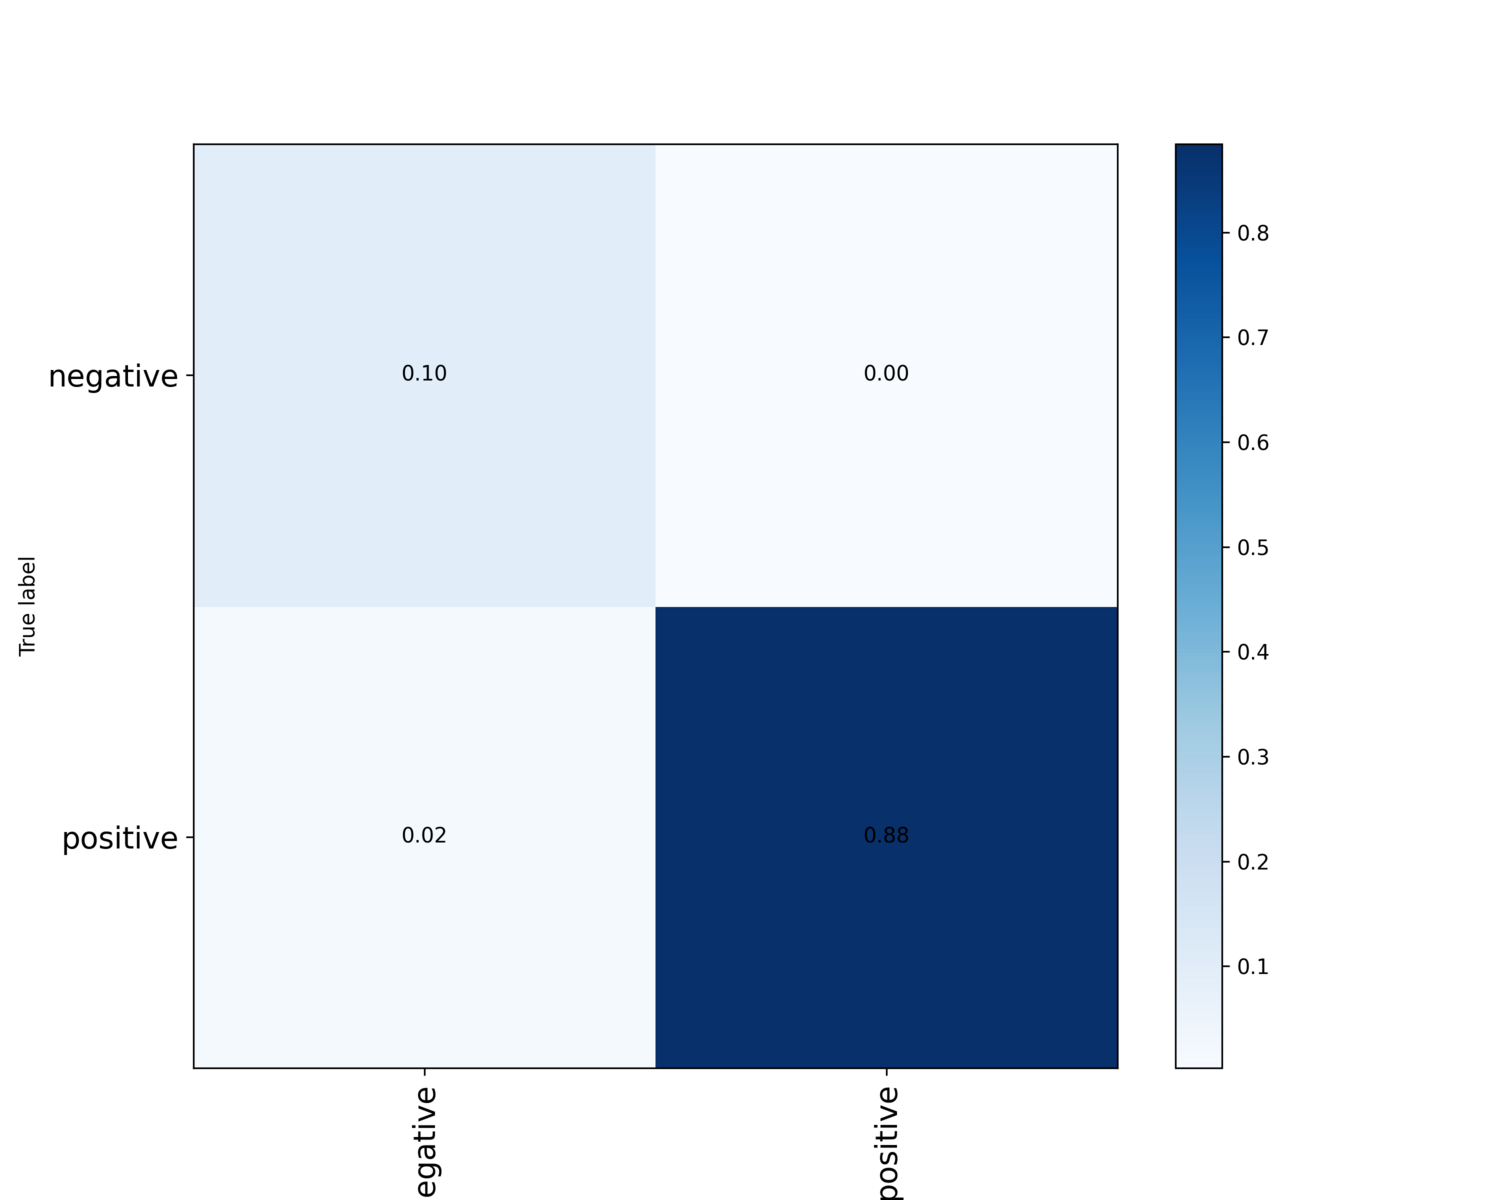

In [39]:
from IPython import display
from base64 import b64decode

base64_confusion_matrix = "iVBORw0KGgoAAAANSUhEUgAABdwAAASwCAYAAADhdIjxAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAC4jAAAuIwF4pT92AAAAB3RJTUUH6AkCBRUSUx3MAgAAgABJREFUeNrs3XecXXWZP/DPuVOTTHohhRo0KE0jUgREQJGqotgbuq66FlwRXd1df+uKa8EKNsTuYmHVXVwRBBXRBQRElN4TwEAKENLLJDP3/v6YZEhIocwZ5x7yfr9edybMOffkuWfIvTOf89znWzQajUYAAAAAAIABqQ11AQAAAAAA8GQgcAcAAAAAgBII3AEAAAAAoAQCdwAAAAAAKIHAHQAAAAAASiBwBwAAAACAEgjcAQAAAACgBAJ3AAAAAAAogcAdAAAAAABKIHAHAAAAAIASCNwBAAAAAKAEAncAAAAAACiBwB0AAAAAAEogcAcAAAAAgBII3AEAAAAAoAQCdwAAAAAAKIHAHQAAAAAASiBwBwAAAACAEgjcAQAAAACgBAJ3AAAAAAAogcAdAAAAAABKIHAHAAAAAIASCNwBAAAAAKAEAncAAAAAACiBwB0AAAAAAEogcAcAAAAAgBII3AEAAAAAoAQCdwAAAAAAKIHAHQAAAAAASiBwBwAAAACAEgjcAQAAAACgBAJ3AAAAAAAogcAdAAAAAABKIHAHAAAAAIASCNwBAAAAAKAEAncAAAAAACiBwB0AAAAAAEogcAcAAAAAgBII3AEAAAAAoAQCdwAAAAAAKIHAHQAAAAAASiBwBwAAAACAEgjcAQAAAACgBAJ3AAAAAAAogcAdAAAAAABKIHAHAAAAAIASCNwBAAAAAKAEAncAAAAAACiBwB0AAAAAAEogcAcAAAAAgBII3AEAAAAAoAQCdwAAAAAAKIHAHQAAAAAASiBwBwAAAACAEgjcAQAAAACgBAJ3AAAAAAAogcAdAAAAAABKIHAHAAAAAIASCNwBAAAAAKAEAncAAAAAACiBwB0AAAAAAEogcAcAAAAAgBII3AEAAAAAoAQCdwAAAAAAKIHAHQAAAAAASiBwBwAAAACAEgjcAQAAAACgBAJ3AAAAAAAogcAdAAAAAABKIHAHAAAAAIASCNwBAAAAAKAEAncAAAAAACiBwB0AAAAAAEogcAcAAAAAgBII3AEAAAAAoAQCdwAAAAAAKIHAHQAAAAAASiBwBwAAAACAEgjcAQAAAACgBAJ3AAAAAAAogcAdAAAAAABKIHAHAAAAAIASCNwBAAAAAKAEAncAAAAAACiBwB0AAAAAAEogcAcAAAAAgBII3AEAAAAAoAQCdwAAAAAAKIHAHQAAAAAASiBwBwAAAACAEgjcAQAAAACgBAJ3AAAAAAAogcAdAAAAAABKIHAHAAAAAIASCNwBAAAAAKAEAncAAAAAACiBwB0AAAAAAEogcAcAAAAAgBII3AEAAAAAoAQCdwAAAAAAKIHAHQAAAAAASiBwBwAAAACAEgjcAQAAAACgBAJ3AAAAAAAogcAdAAAAAABKIHAHAAAAAIASCNwBAAAAAKAEAncAAAAAACiBwB0AAAAAAEogcAcAAAAAgBII3AEAAAAAoAQCdwAAAAAAKIHAHQAAAAAASiBwBwAAAACAEgjcAQAAAACgBAJ3AAAAAAAogcAdAAAAAABKIHAHAAAAAIASCNwBAAAAAKAEAncAAAAAACiBwB0AAAAAAEogcAcAAAAAgBII3AEAAAAAoAQCdwAAAAAAKIHAHQAAAAAASiBwBwAAAACAEgjcAQAAAACgBAJ3AAAAAAAogcAdAAAAAABKIHAHAAAAAIASCNwBAAAAAKAEAncAAAAAACiBwB0AAAAAAEogcAcAAAAAgBII3AEAAAAAoAQCdwAAAAAAKIHAHQAAAAAASiBwBwAAAACAEgjcAQAAAACgBAJ3AAAAAAAogcAdAAAAAABK0DrUBcBQajQa6enpSVEUaWlpGepyAAAAeJJoNBrp7e1NrVZ7Uv++2Wg0hrqEUhRFMdQlAE8SAne2abNmzcrpp5+eNWvWpLOzc6jLAQAA4Emit7c3K1asyCGHHJITTzzxSRu6z5s3L1/96lezdOnSyoXWjUYjo0aNyjvf+c5MnTp1qMsBniQE7mzTFixYkB/+8IdZvnx5ho/oGupyAKDpFUkq9rs0AAyBIj29PVm2dGlqtVpe//rXP2kD94ULF+Yb3/hG7r///lQvZurJpEmT8qpXvUrgDpSmas+EUKoRI0akKJKjX/yyvOu9HxjqcgCg6Q1rb8nw9pY8Sd49DgCDolar5fbbb8vb3vLmDBs2LK2tT/L4pVFPMfopaZu8T/ouzzf7Dwp9Na6df03SWDzUxQBPMk/yZ3zYur4OgyLjxk/I0/fYq3JvfwOAv6VGI+nqrGVEx5OzQw8AylKrJUkjra2taWlp2TZ+12ztTDFsQoqKBO6NNJJWo2WB8gncIUkajdTr9W3jhyAAeIIajUbq9SL1+lBXAgDNr15vpPmD5zIVW/hzM6tKnUCVCNwBAAAAKEFRncVetqVrIcDflMAdAAAAgPI0+2IvVbkoAFSSwB0AAACA8gi0gW1YbagLAAAAAOBJoChSjbnoFRp9A1SODncAAAAABqjY4FMFwuxGReoEKkfgDgAAAMAAbTC3vTIz3Ju8TqCSBO4AAAAADNAG3eKVGddSlTqBKhG4AwAAADAwRZKiQksFFoW8HRgUAncAAAAABmj9DPeKpNiNRiTuwGAQuAMAAABQnsrMcAcon8AdAAAAgIErKtTlXoUagUoSuAMAAABQjqoE2c3ehQ9UlsAdAAAAgPI0e5hdlYsCQCUJ3AEAAAAoj0Ab2IYJ3AEAAAAYmKJIitpQV/E463VhACifwB0AAACAclQlxG72sTdAZQncAQAAAChPs4fZVbkoAFSSwB0AAACAgVsfZFch0K5CjUAlCdwBAAAAKEdVguxm78IHKqtCq1kAAAAAAEDz0uEOAAAAQHmavXu8Kl34QCUJ3AEAAAAYoGJdkF1UI9Au+j8AlErgDgAAAMDArA+wqxC2J0ljXc1N3owPVI/AHQAAAIDyGCkDbMME7gAAAACUR6ANbMNqQ10AAAAAAE8C62e4N70Kjb4BKkeHOwAAAADlqMpipE0+9QaoLoE7AAAAAOUxwx3YhgncAQAAABig4uGRMlUItKvSiQ9UjsAdAAAAgIFZH2BXIWxP+kbKFDFaBiidwB0AAACA8hgpA2zDBO4AAAAAlEegDWzDakNdAAAAAABVt8EM96ZXpVqBqtHhDgAAAEA5qrIYaZNPvQGqS+AOAAAAQHnMcAe2YQJ3AAAAAAZu/ZiWKgTaFSgRqCaBOwAAAAADU6WwPekbKVOVWoFKsWgqAAAAAACUQIc7AAAAAOUxwx3YhgncAQAAABi49UF2FQLtKtQIVJLAHQAAAIByVCXIbvYufKCyBO4AAAAAlKfZw+yqXBQAKkngDgAAAEB5BNrANkzgDgAAAMAAFUlRG+oiHke5RV/NACUTuAMAAABQjqp0tzf72BugsgTuAAAAAJSn2cPsqlwUACpJ4A4AAADAwK0f01KFQLsCJQLVJHAHAAAAYGCqFLYnSSPVqRWoFIE7AAAAAOUxUgbYhgncAQAAACiPQBvYhgncAQAAABiYIklt3ViZNHmHe4q+Ml0XAAaBwB0AAACAchT9H5pbs18TACpL4A4AAABAecxwB7ZhAncAAAAAyiPQBrZhAncAAAAABqhIitpQF/E4yjXEHRgcAncAAAAAylGV7vZmH3sDVJbAHQAAAIDyNHuYXZWLAkAlCdwBAAAAGLj1QXYVAu0q1AhUksAdAAAAgHJUJchu9i58oLIE7gAAAACUp9nD7KpcFAAqSeAOAAAAwABtEGJXJtCuSp1AlQjcAQAAABiARl92XdSGupDHrijW5e1N3o0PVI7AHQAAAIByVKW7vdnH3gCVJXAHAAAAoDzNHmZX5aIAUEkCdwAAAAAGqHg4yK5CoF0UMcMdGAwCdwAAAADKUYWwPWn+LnygsgTuAAAAAJSn2cPsqlwUACpJ4A4AAABAeQTawDZM4A4AAADAwBRJitpQV/E46i2McAcGhcAdAAAAgAGq0IKpybqxNxWpFagUgTsAAAAA5THDHdiGCdwBAAAAKI9AG9iGVWi4FgAAAABNqyhSjTEthYsCwKDR4Q4AAABAOYr+D82tyafeANUlcAcAAACgPGa4A9swgTsAAAAAA1Q8PFKmCoF2VTrxgcoRuAMAAAAwMOsD7CqE7UnfSJkSS200Glm6dGnuuOOOLFiwIKNGjcqMGTMyceLE1GqPbwnFRqORZcuW5Z577sncuXPTaDQyefLk7Lzzzhk9enSKqpxj2EYJ3AEAAAAozzY2UqbRaOSyyy7Lpz71qVxxxRVZs2ZNarVadtttt5x88sl5xStekba2tsd0rHq9nksuuSSnn356rrzyynR3dydJ2trass8+++Qf//Efc9RRR6WlpWWozyKwBQJ3AAAAAMqzjXVg/+Uvf8k73vGOzJo1K8cff3ye/exn5+67785//dd/5aSTTkpra2te+cpXPqZjXXnllXn729+eOXPm5Oijj87BBx+coijyhz/8IRdccEFuuummfOc738kLX/jCoX7YwBYI3AEAAAAYuPUz3NPkHe4pShsn093dnTPPPDM33XRTTj755HzsYx/LiBEj0tPTk2c961l517velS984Qt57nOfmylTpmz1WD09PfnhD3+YWbNm5U1velNOP/30jB49Okny9re/PR/84Afz1a9+NWeffXYOOeSQdHZ2DvWJBDbj8Q2RAgAAAIBNFA9/Koomvz2i5gGYPXt2Lrzwwuywww55y1vekhEjRiRJWltb89KXvjQHH3xw/vznP+fyyy9/1GOtXLkyd9xxR1pbW/PCF76wP2xPkq6urhx11FHp7OzMrFmzsnLlyqH+hgNbIHAHAAAAoDyNRnPfSnTttddm/vz5eeYzn5mddtppo21jxozJQQcdlDVr1uSqq6561GO1trZm5MiR6e3tzerVqzfZvnr16vT29mbs2LGPeSY88LcncAcAAABg4NaPlClqzX1LscGc+SLFAGbOz549Oz09Pdl11137u9s3tMsuu6RWq+Wuu+561K704cOH56ijjkpbW1t+8IMf5NZbb013d3e6u7tz55135nvf+15aWlpy/PHHZ+TIkUP93Qa2wAx3AAAAAEqwYZDd5Bp95fb0rM3tt9+eoihSr9cf3txoZNSoUdlhhx3S0tKyxcM89NBDSZJx48ZtNrgfP358Ojo68uCDD2bNmjUZPnz4Vst61atelblz5+ass87K8ccfn5kzZ6Yoilx33XVZsWJFPvGJT+S1r33tUJ89YCsE7gAAAACUp+SxLaVbF4zXiloWLVqSN7/5zWltbU1jg7p7e3tz7LHH5hvf+MZmO9fX77Nq1aokSUdHx2b36ejoSK1W6x8H82i6urpy6KGH5re//W2uvPLKLFy4MEmybNmy7LHHHtlxxx3T3t4+1GcQ2AqBOwAAAADlqUiXe6PRSGdnR4477rhMmDBho8C9Xq9n7733TmvrlqOzoij6u9+3FKav/3pLS8tjGl1z/vnn593vfneGDRuWM888MwceeGCKosjVV1+d0047LW95y1vy2c9+Nm95y1sGNAoHGDwCdwAAAAAGpigenuGeJu9wT5EUfVWO7OrKBz/4wey9994bBe6PRa1W65+lvmLFis3us3z58qxduzZdXV1bDe+T5MEHH8ynPvWp3H///Tn77LNzwgkn9G+bMWNGxo8fn1e96lU544wz8sIXvjA77rjjUJ9IYDMsmgoAAABAOYo8HL437W3jetd3ihdFsdnb1kydOjVJMnfu3Kxdu3aT7fPmzcuaNWuy/fbbZ9iwYVs91t13352bb745O+64Yw488MBNtj/72c/OU57ylNx999258847h/o7DWyBDncAAAAAylORGe5l2H333dPV1ZUbb7wxixcvzsSJE/u39fT05Prrr+/fr62tbavHWrNmTer1elpaWlKrbb5HtqWlJY1GIz09PUN9FoEt0OEOAAAAQHmGvIP9UW4l2nvvvbPnnnvmxhtvzKWXXrrRtttuuy2//e1vs9122+WQQw7p/3pPT0/mzZuXuXPnZs2aNf1fnzx5csaOHZt7770311133SZ/1y233JLZs2dn9OjR2WGHHYb6uwxsgcAdAAAAgCeukfTNZqll3UyZ5r+tr3WAzfgTJkzIm9/85vT29uY//uM/8utf/zr3339/rr322vzbv/1bZs+enRNOOCF77713/30eeOCBvOhFL8oLX/jC3Hzzzf1fnzZtWo4++ugsXbo0//Zv/5YLL7ww8+fPz/z58/Ob3/wm//Iv/5KFCxfmhS98YXbeeeeh/q4DW2CkDAAAAADlKLmDfNCUOPbm1a9+dW655ZZ8/etfzwknnJApU6Zk0aJFWbx4cY499ticcsop6ejo6N+/t7c38+bNy6pVqzbqcO/o6Mgpp5ySuXPn5pe//GVe/vKXZ+rUqSmKor8b/phjjsmHPvShR50HDwwdgTsAAAAA5dmGZrgnyahRo/Kxj30sBx10UH79619n/vz5GTVqVA466KAcf/zxmTx58ib7v+9970tPT0+mTZu20bZdd9013/zmN/OrX/0qf/jDHzJv3rw0Go08//nPzwEHHJCjjjoqkyZNGuozCGyFwB0AAACAgSmyLsguf0764NVb3uG6urry8pe/PMcff3y6u7vT2tqa9vb2FJs5F6NGjcopp5yyxWNNmDAhr33ta/OqV70q3d3dSZL29va0torxoAr8SwUAAACgBBUJ25MBz27fktbW1tKC8ZaWlgwfPvxveFKAMgjcAQAAACjPNjZSBmBDAncAAAAAyiPQBrZhtaEuAAAAAICqKx6e4d70qlQrUDU63AEAAAAoR9H/obk1+dQboLoE7gAAAACUxwx3YBsmcAcAAABg4NaPaalCoF2BEoFqErgDAAAAMEAVCtuTdSNlKlIrUCkWTQUAAAAAgBLocAcAAACgPGa4A9swgTsAAAAAA1Pk4SC7CoF2UZgoAwwKgTsAAAAA5ahC2J40fxc+UFkCdwAAAADK0+xhdlUuCgCVJHAHAAAAoDwCbWAbJnAHAAAAYICKpKgNdRGPo9wihrgDg0HgDgAAAEA5qtLd3uxjb4DKErgDAAAAUJ5mD7OrclEAqCSBOwAAAAADU+ThILsKgXZRmCgDDAqBOwAAAADlqELYnjR/Fz5QWQJ3AAAAAErTaPIwu6jKRQGgkgTuAAAAAAzY+hi7CoF281cIVFVtqAsAAAAAoNqKFOvGyVQhyu6rtahErUDV6HAHAAAAoBR9ze3NH2Q3+dQboMIE7gAAAACUopE0f5pdgZE3QHUJ3AEAAAAYmGKD2e1VCLSLogqN+EAFCdwBAAAAKEUVFkxNkkazd+EDlWXRVAAAAAAAKIEOdwAAAADK0+zN49VowgcqSuAOAAAAwMAVj/jczKpQI1BJAncAAAAAylGVILvZu/CByhK4AwAAAFCaZl+QtCoLuwLVJHAHAAAAYMD6J8pUINBu/gqBqqoNdQEAAAAAVFtRFMn6W7NbV2cVLgwA1aPDHQAAAIBSFEklQvfmHnoDVJnAHQAAAIBSNJKkyWe4V+GCAFBdAncAAAAABqx/REsVAu0q1AhUksAdAAAAgFJUZS56o9m78IHKErgDAAAAUJpmD7OrclEAqCaBOwAAAAClEWgD27LaUBcAAAAAQMUV64L2KoTtRbGu1qEuBHgy0uEOAAAAQCmKpBKhe3MPvQGqTOAOAAAAQGnMcAe2ZQJ3AAAAAAbo4RC7OoF2VeoEqsQMdwAAAAAGpEj1ZrhXoFKggnS4AwAAAFAKM9yBbZ3AHQAAAIDyNHua3fzXA4AKE7gDAAAAMHDFIz43syrUCFSSwB0AAACAgalS2J70deFXpVagUgTuAAAAAJSm0WjumTJFBWbMA9UlcAcAAACgNAJtYFtWG+oCAAAAAKi+oiiSKoTtReGiADBodLgDAAAAUIoiqUTo3txDb4AqE7gDAAAAUBoz3IFtmcAdAAAAgAEp8vCYlioE2kVRpEjz1wlUj8AdAAAAgFJUIWxPmr8LH6gugTsAAAAApWn2MLsqFwWAahK4AwAAADBg62PsKgTazV8hUFW1oS4AAAAAgOpqJH0JdlH03Zrd+jqLdbUDlEiHOwAAAAClKJJKhO6CdmCwCNwBAAAAKI0Z7sC2TOAOAAAAwAAVFZzh3vx1AtVjhjsAAAAAA1e1Ge4Ag0CHOwAAAAClMMMd2NYJ3AEAAAAoT7On2c1/PQCoMIE7AAAAAANXPOJzM6tCjUAlCdwBAAAAGJgqhe1JXxd+VWoFKkXgDgAAAEBpGo3mnilTVGDGPFBdAncAAAAASiPQBrZltaEuAAAAAIBqK7IuaK9C2F4UKYrCRBlgUOhwBwAAAKAURVKJ0L25h94AVSZwBwAAAKA0ZrgD2zKBOwAAAAADtj7HrkKgXYESgYoSuAMAAAAwQEWSohJhe5L0NeFXo1agWiyaCgAAAAAAJdDhDgAAAEBpzHAHtmUCdwAAAAAGpCgeDrKrEGgXRWGOOzAoBO4AAAAAlKIKYXvS/F34QHUJ3AEAAAAoT7Nn2dW4JgBUlMAdAAAAgPIItIFtWG2oCwAAAADgSaBINcL2qtQJVJIOdwAAAADKI8wGtmECdwAAAABK0+wLklZlYVegmgTuAAAAAAxM8XCQXYVAuygKnfjAoBC4AwAAADBA1Qnbk/Vd+NWoFagWgTsAAAAApTFSBtiWCdwBAAAAGLD1MXYVAu3mrxCoKoE7AAAAAANSJElR9N2avMM962fND8Khe3p60t3dndbW1rS3t1fi4gNQLoE7AAAAAKXoD96bXNmXBJYvX56LLroov/71rzN//vyMGjUqBx54YF760pdmu+22e0zHWLZsWb773e/m/vvvT61W22R7URRpNBrZZZdd8upXvzqdnZ1DfRqBzRC4AwAAAFCabW2G+9KlS/PRj340Z511Vmq1WiZPnpzFixfnnHPOyQUXXJAzzjgju+yyy6MeZ+XKlfne976X2267bZPAvdFoZNWqVenp6ckJJ5yQV77ylUN9GoEtELgDAAAAMGDrg+wqjFEps8ZzzjknX/7yl7P77rvn05/+dJ7xjGdk7ty5+djHPpZzzz03O+64Yz73uc+lo6Njq8cZO3Zsvv3tb2fVqlWb1LpkyZKccsopuemmm/LCF74ww4cPH+pTCGyBwB0AAACAAapO2J6s78IfeK0PPvhgvvvd76alpSUf/vCHc8QRRyRJJk2alFNPPTXXXXddfvrTn+bEE0/Mvvvuu9Vjtbe3Z++9997stv/7v//LnDlzsssuu+Twww8f6tMHbEVt4IcAAAAAgG3P9ddfnxtuuCF77rlnDjnkkI227bbbbjn88MOzYMGCXHrppU/476jX6zn//POzePHiPP/5z89OO+001A8b2Aod7gAAAACUZlua4X7zzTdn+fLl2XPPPTNmzJiNtrW2tvZ3rN90001Zu3Zt2traHvffMX/+/Fx00UUZNmxYjj322Cd0DOBvR+AOAAAAwMAUFZzhvq7M9RcItnShYGuPZ+7cuUmSqVOnbjYInzJlStrb23Pfffdl1apVTygsv/zyy3PLLbdk5syZOeCAA4b61AGPQuAOAAAAQCmqELYnfeF6URRZvmxZTjvttEyYMGGjwL1er2fvvffOiSeeuMXFTuv1epYtW5YkGTFixGb36erqSmtra5YtW5aenp7HXWd3d3d+8YtfZM2aNTn66KMzadKkoT51wKMQuAMAAABQnuaeKNPf2V4kWdW9Jr/4xS/S2tq6UeDe29ubY489Nq973eu2GLg3Go309vYmSVpaWja7T0tLS4qiSG9v7xMatTNr1qz87ne/y4QJE3LUUUcN9ZkDHgOBOwAAAADlqUaTexqNRsaMGZ1vfuvb2W233VKv1zfaNmrUqHR2dm7x/i0tLRk2bFiSvk70zenu7k69Xk9nZ+cWQ/mtufjii/PXv/41L37xi7PHHnsM9SkDHgOBOwAAAAADV6y7VaTDvZGkrbU1M2bMeMJh9rhx45IkDz30UP+Ymg0tXLgw3d3dGT9+fNrb2x/XsZcuXZrzzz8/RVHkuOOOS1dX11CfOeAxELgDAAAAUJ6KdLgnfaH7Exn1st4uu+yS1tbWzJo1KytWrNgkFL/rrrtSr9czffr0DB8+/HEd+7rrrstVV12V6dOn57DDDhvqUwU8RrWhLgAAAACAJ49Go9HUtzLNnDkzkydPzrXXXpt77rlno22LFy/O5Zdfnvb29uy///6P+xz+8pe/zOLFi/OCF7wgO+2001B/W4HHSOAOAAAAwIAURd+t789FU98eWe9ATJ8+PUceeWTmzJmTb33rW1mxYkWSpKenJ+eee24uu+yyzJw5MwcddFD/fZYuXZrPfe5zOe2003Lfffdt9rjz58/PhRdemGHDhuXYY49NW1vbUH+LgcfISBkAAAAASlBsMsO8WZXV6N7R0ZF3vvOdueKKK3LmmWdm3rx52XfffXP33XfnnHPOSWdnZ04++eRMmTKl/z5Lly7N5z//+axatSqHHXZYpk2btslxL7vsstx0002ZOXNmDjjggKE+XcDjIHAHAAAAoDRlj20pW9kXBWbOnJmvfe1r+eQnP5mLLroo5513Xmq1WmbMmJGTTz45L3vZyzbav6WlJVOmTMnq1as3u5BqT09PrrnmmowdOzYve9nLMnHixKE+ZcDjIHAHAAAAoDRV6XIv8/EefPDB+dGPfpQ77rgjCxYsyKhRozJjxoxMnDgxtdrGE50nTpyY8847L41GIxMmTNjkeLVaLaecckre/e53Z8yYMUP98IDHSeAOAAAAwACtGydTFOXNaxm0Uousm+Re4iGLjB49Os9+9rMfdd/W1taNRsw8Uq1W09UOFSZwBwAAAKAURVLOaqSDrMkvCQAVJnAHAAAAoDTb2gx3gA0J3AEAAAAYkL5pMusGtVQg0C6KogqN+EAFCdwBAAAAKEUVwvak+bvwgeqqDfwQAAAAAACADncAAAAAytPszePVaMIHKkrgDgAAAMDAFY/43MyqUCNQSQJ3AAAAAMpRlSC72bvwgcoSuAMAAABQmmZfkLQqC7sC1SRwBwAAAGDA+ifKVCDQbv4KgaqqDXUBAAAAAFRdkRTrbs2uv84K1ApUjg53AAAAAAam2OBTBUL3xgY1A5RJ4A4AAADAwGwwtr0yM9ybu0ygogTuAAAAAAxI35SWYt2fm791vCiKKjTiAxUkcAcAAACgFFUI25Pm78IHqkvgDgAAAEBpmj3MrspFAaCaBO5s1fLly/Pd7343CxYsyO67754TTjgh7e3tQ10W0IQajca6t2UW636ALdJII416vX/b4z1WsvEPw41GY4vH2vDrtVqt7z2t6/bf2v0AYCg0GuvHLyRFrW/dvkYjqdcf3vaEjlX0vwRudHvk8Tb82gYvm1u9D8Bj5eduYFsmcN/GNBqNdHd3p6enJ0VRZNiwYX3B1BYsW7YsX/rSl3L77bfnuOOOy4te9CKBO7CJRqORWq2W3p6e3HffnNxz1+z09PRk6vY7ZKedp6ezs/Mxhd7rt7e0tKbRqGfF8uVZsXxZenp60t7RkbHjxm/2OWvDsH/FiuW5e/asLJg3N53DhmWX6U/JdlOmpigKoTsATaHR6Au5e3p6cu+cezNr9qz0rF2bHXbYMdN33SWdncMec+j9cNjeyMKFD+WO22/PQw89lHHjxuepM56a8ePHJSk2OtaGAf2K5Sty56w7M/e++zJ8+PDs+pSnZurUKSmKmtAdeNyKDa/6NbOiiKc3YLAI3Lcxa9euzVe+8pVcfPHF2W677fKZz3wmEyZM2Op9qrToCfC3tz5sX7J4cb73zTPzkx+dnQfun58kGTGiK0ccdVze8d73Z6edpz/qsYqiyNq1a3LpJRfn6qv+kNtvvSWz77w9y5YuzX7POSinnXFmRo4cnaSxyf2KosjNN16fr3zhtFz++0uyunt1ihSZtsOOecPfvT2vfO0b0zlsmNAdgCG1PmxfvHhRzvzKV3P2f343CxbMTxqNdI0cmWOPe3He/08fzPTpj/66uT4Qr9fruejCX+bzn/10brj+uvT09KS1tTV7PeMZOeX9H8wLjzwqtVptk07466+7Lp/+1CdzySUXZ/Wq1SmKZMcdd8rb/uGdeeOb3pRhw4YL3YHHrtjgUwWeOBob1AxQJoH7NqZer+eaa67JL3/5y0ybNi2rV6/e6v4tLS2ZPHlyFi1alPHjxwupgE0URZE1a9bka1/6XM768hey8y675u/f8Z4MGz4iv7/4V/nR97+TBx+8P6edfmbGT5iYer2+xeeSoiiyYvmKfPX0z+Tqq/6Q4SNGpK2tLUsWL87CBx9Io17fpGFmfeB/z92z8+EP/GP+cs0fc+jhL8z+Bz03Cx94IOf97Cf5xL//c+r1ek78+3/wPAbAkCqKZM2aNfn8Zz+bL3zuM9n1KU/Je/7x5AwfPjy//tVF+e63v5kH7l+Qr571jUycODH1+pZzq6LoC+8v+e0lOeld/5BlS5fmZS9/RZ7+9N1zy80353/++yc56Z3/kG98+7s5/PmH94+rqbUks2fNzntPenf++Mcrc8SRR+WQQ56X+++/Pz/98X/lXz70gdTrvfmHd74rRVF7fA8QIGa4A9s2gTtbNX78+JxzzjlZu3Zthg0blmHDhg11SUATaTQaaWlpyXV/vjrnnP2dTJk6LZ8+42vZ7zkHpSiKHP/yV+cDJ70tv7nwgvzyvHPz+je/7VFHyrS1t+WYl7wsxx5/Qp6+x96Zfedt+cg/n7LF+xRFkd7e3vz0R2fnT1f9IS95+aty6qe+kAkTJ6W3tzf7HXhQ3v/ut+W73/hqnnvo4XnKjKenXu/1QzYAf3ONRtLSkvzp6j/mO9/6RqZtv33OPOubOejgA1MUyatf87q8/a1/lwvO/0V+9j//k7e+/e1bbxItksWLl+ZLZ5yeeXPn5tT/+ETe8973Zviwjqxc1Z1dn/LUfOT//Uu+/MXTs8+z983IkSNTFElvTz3f/8/v5Q9/uCyves1r8/nTv5hJk8ant7eRg597SN72ljflzK98Oc9/wRF52tOflt7eSjSrAk3Ez9rAtky7wjbo8bzwre9w32GHHTJhwoStznsHtj3rw+7fXHRBFj74QI59yQnZZ78D0tvbm56enuyw4055zRv/Li0ttVz4i//NsqVL8mjv2xw+fETe/LZ35e/f8Z4897DnZ9J2U7K1CYtFUeTBB+7Pry44LyNHjcrr3vTWjJ8wMT09PWk0GnneYUfksBccmbtm3ZFLf3fxurfR+wUAgL+9okh6exu54Be/yAMPPJATXv6KHPCcA9Lbm/T0JDvtvEP+7i1vTa2lJf/7s//JkiVLtxp014rk+uuuzeWXX5o99twrr33d69PR0ZE1a5OOjo689vWvzx577pXLLv2/XH/dtf2Lo95//4Kc9/OfZdSo0fn7t749EyeOT09P0mgUecERR+TIo4/JHXfcnot/8+ukELYDj02R4uEZ7s1u3UhKk9yBwfCk6XBftWpVHnrooTQajYwePTojR47MqlWrctNNN+Waa67Jgw8+mI6Ojuy6667Zb7/9MnXq1McUuKxcuTK33XZbrrvuusybNy+9vb0ZO3Zs9txzzzzjGc/I6NGjH9NxVq9enbvvvjt33HFHVq5cmbFjx2bGjBmZNm1a2trasmrVqixbtixFUWTkyJHp7Ozc5Bj1ej1LlizJPffck1tvvTVz587NypUr09HRkcmTJ2evvfbKbrvtttku9N7e3lx11VW57bbbcvfdd/c/tnPPPTfjx4/vf7tXo9HI7rvvnmc961n993vggQf6O9zHjRvXH7ovXbo0S5YsSVEUGTNmTLq6uh71PDyW+zQajSxevDg33HBDbr755ixcuDBFUWTy5Ml55jOfmac//ek67aFJFEWRpUuX5Nprrk5HR2f2PeDAtLS0pKenJ0nf89YzZj47kyZPyS033ZD58+bmqaPHpFHf/FtMN5yv3tvbm0Ye/e2oRVFk1h2356/33JVdn7pbnjrj6anX6/3bO4cNy74HHJj/+fEP85drrs7qVavS3tEx1KcOgG1QUSRLlizJ1Vf/MZ2dnTnwwIPS0lLLupfN1OvJPvvumylTpuSGG67P3Ln3ZcyYUVtce7Aokmuu+VOWLlmS/fY/IJO2265/BE29nmy33XbZb//9c8P11+WaP12dQ5733CTJ7bfdlrvuuiu77bZbnv703bPBy2aGDevIgQcenB9+/+z88Y9X5e9Wvi0dXjeBx6FSM9wBBsGTJnC/9NJL8+53vzsrVqzIRz7ykRxzzDH5xCc+kf/+7//Ogw8+2B++DBs2LHvuuWf++Z//OS95yUu22LFdr9dz1VVX5Utf+lJ++9vfZuHChf0BUlEUGT16dA444ICccsopOfzww7d4nEajkRtvvDFf/OIXc9FFF/Ufp62tLVOmTMkrXvGK/OM//mMuu+yyfPzjH09ra2v+/d//Pcccc8xGx1m5cmW+/vWv53/+539y6623ZsmSJVmzZk3/9ra2towfPz5HHHFE3vve92bmzJkbXQhYu3Ztvva1r+X73/9+/9cWLVqU973vfRvt19PTk/e///39gfvChQvz6le/OrfcckuOOeaYfPnLX86IESOSJL/61a/ygQ98IN3d3fnHf/zHfPCDH9zq92jt2rU59dRT8/3vfz9jx47NWWedlUMOOWSjfVavXp3zzz8/Z555Zq655posXbq0/3vX0tKSCRMm5Nhjj8373ve+7LHHHkP9vx2QZMXyZZnz17szoqsrO+60yyaLko4aPSZTp+2QG6/7S+6d89fMeNoeW/zh9ol0nhdFkb/ec1dWrliRHXfaJcNHjNgopG80kh122iXDh4/IX++enZUrV6Sjs7Pp50oC8OS0bNny3H33Xenq6srOu+y6yaKkY8aMyQ477JC//PnP+es992SPPZ6+xWOtXVvP3bNnJ0mmT5+ejo7W/vA+STo6WrPLLrsmSe66666sXVtPe3std82enRXLl2eXXXbNiK4RmwT6O0/fJSNGjOjbb8WKdHZ2xMsm8Lg0+3NG818PACrsSRO4r1q1KnPnzs2KFSty44035vzzz895552XCRMmZObMmWlra8u9996buXPn5uqrr85JJ52Urq6uHHHEEZscq16v59xzz80//dM/Zfbs2anVapk0aVK23377tLe3Z968ebnvvvty4YUX5oYbbsjpp5+eE044YbNB0R//+Me8853vzJ///OckfYH/2LFjkyT33XdfPvWpT2XWrFl52tOeluuvvz4tLS1ZtGjRJsdZunRpvv71r+eWW25JV1dXpkyZkkmTJqWjoyNLlizJvffem/nz5+fss8/O9ddfn2984xvZd999++9fFEVGjRqViRMnZtmyZVm1alVqtVomTJiQlpaW/v16eno26jrv7e3N/Pnzc//992fhwoUbBVTPfOYz09ramrvvvjs/+9nP8nd/93eZOHHiFr9Hf/3rX3PeeedlwYIF2WWXXfK0pz1tk+/h6aefntNOOy1LlixJe3t7dthhh0yZMiX1ej1z5szJ/Pnz8+1vfzs33nhjzjrrrDzzmc8c6v/1YJtWFEWWL1uWlStWpLNzWEaOGv2IsLtvJvvYceOyZk13Fj20sPRml6IosvihvuensePGpb2t7RF7NDJm7Li0t7dn0UMPbXSxEgD+looiWbZsaVasWJFhw4Zl9JjRj1gIPGlra8+4cePT3d2dhxYu3Orx1qxZk4Xr9hk7btwmoXgjybhxfb97PLRwYdasWZOO9s48tO51c9y4cWlra9/4Po1k3NjxaW/v6L8PwGNWPOJzM6tCjUAlPWkC9w3D7h/+8Ifp7e3Nu9/97rz5zW/ODjvskFqtlvnz5+eMM87It7/97dx333350pe+lAMOOCAjR47c6FhXXHFFPvCBD+Suu+7KpEmT8g//8A95+ctfnilTpqRWq2XJkiX5+c9/ns9+9rO5995785GPfCS77bZb9tprr42Os2DBgvy///f/8uc//zm1Wi2HH3543vrWt2bvvfdOURS5+eab881vfjM///nP88c//nGTx/HIx/f0pz89xx13XJ7//Odnt912S1dXV1paWrJ27drceeed+fa3v50f/vCHue666/KJT3wi3/ve9zJq1KgkSXt7e0499dScfPLJef/735+f/exnmTRpUn7+859n6tSpG42U2fB8bK3bdKeddsoLXvCC3Hnnnbnxxhtz1VVX5bjjjtvi/r/73e9y1113JUmOPvroTJo0qX9bo9HID37wg3ziE5/I8uXLs8cee+Q973lPXvCCF2TMmDFpNBqZO3duvvOd7+Qb3/hG/vjHP+ajH/1ovv3tb/dfwACGRvfq1anXe9Pe3r7RBbz1arVa2ts70tvbm+7u1YNTw7rjtrd3pNjMO47a2ztSa2lJ9+pVG42bAYC/tdWrV6e3tzft7R1pqW3+dbOjo+91c/Xqrb9urt+n1tKSjvbNjH1pJO0dnanValm9elXqvb39NSR9c95rm6mho6MjLS21rNrgPgCPqkphe9J3VbIqtQKV8qQJ3De0ePHifPCDH8yHP/zhjWZ9jxs3LqeeemruvPPO/Pa3v82VV16ZW2+9daNO8OXLl+cLX/hC7rrrrowZMyaf/exn89rXvnajEGncuHF5z3vek4kTJ+Yd73hHbr755px99tn55Cc/udF+P/3pT3PJJZckSY488sicddZZ2WGHHfq377bbbjnwwAPzrne9K//93//d9w1p3fy3ZNy4cTnzzDMzbty4ze4zadKk7LXXXmltbc1ZZ52VSy65JH/84x/zghe8IElfcD5u3LgMHz48w4cPT9I3omXKlCmZNm3aEzrPbW1tOeaYY3L22Wdn+fLlueCCC3LUUUdttr4VK1bk/PPPz9q1azNp0qQcddRRG22/8847c/rpp2f58uXZfffd881vfjMHHHDARvuMHz8+H//4x9PR0ZFPf/rTufDCC3PhhRfmNa95zVbr3NLYiKIo1m1r9ve6QXOrtbSkKGrprfdu9t9bo5HU670pimKzwUI5NfQ972wpTK+vq62lpcWCqQAMqfWvRb313jQ293Noo5He3nrf62ZLbavH6tunpe8+W3kNTPper9e/zWz97yx999k0cer1ugkMULOPb/TcBgym2sAP0Xz22GOPvO1tb9vswprbbbdd/3z0xYsX5+abb95o+5/+9Kf89re/TZK89KUvzStf+crNdmwWRZGXvOQl/YH2L3/5yyxYsKB/+5IlS/Kzn/0sPT09GTduXD7wgQ9sFLZvWM/73//+bLfddlt9TG1tbZk0adIWA/kkGTlyZN70pjdl3LhxWbJkSa666qrN7lfmC9/+++/f39n/29/+Nn/96183u9+tt96aK664IklywAEHZPfdd99o+/nnn5+bb745ra2t+Yd/+IdNwvb1hg0blr//+7/PjBkz+ue9P1rnz5o1a/KNb3wjJ510Uv7xH/9xo9tpp52WZcuWu6oNT1CjkYwYMSKtra3pXr063d3dj9ijSG9PT1asWJ7W1raMeAyLKz/uGpKMGNF33BUrlvevt7GhlStWpKenJ8O7Rqal5Ul5rRmAiuga0ZW2trasXr063asf8bpZJD29PVm+fHna2trS1TVyq8dqbW3NyJEjU6/Xs2LFshRF+sfKrJ8Nv2L58tTr9YzsGpnW1tY0kv4RksuXb/51c8W6r3etuw/A41UURVPfAAbTk/Knp+c85znZfvvtt7h91113zfDhw7Ny5crcf//9G227/PLLs2jRogwbNizHHHNMOjo6tnicESNG5KCDDsr//M//5N57782sWbMyderUJMmcOXNy4403JklmzpzZvwjp5uy111454IAD8r//+7+P6fE1Go2sWrUqK1asyNq1a/s7OouiWPeDeVceeuihdQsjrU3bJvOMy7O+W/3KK6/M7Nmz8/vf/z7Tp0/fZL+LLroo8+fPT2tra4499tiN5sSvXLkyl156aRqNRqZMmZIjjzxyq3/ntGnT8qxnPSu33nprrr/++ixZsiSdnZ1b3L+npye/+93vcv7552908aQoivT09GTt2rUpJO7wBDXSNXJUJkyclHvn/DUPLJifnXeZnnq9vu6H2b5xLwvmz0/nsGGZPGVq+d0ujUYmT5mStvb2LJg3N93dq9fNo230L+B6/4J5Wb1qVaZMmZrOYRZMBWBoNBp9TTITJ07KnL/ek/nz52X6rrukXu8Lx4skq1etzvx5czNs2LBMnTZtq4uVdna2Z8q63z/mzZ3Xf5yk73O9nsybNy9JMnXatHR2tqfRSKZMnda3NtXc+7J69aq0tbcljYdD+nnz5mbVqlWZNm1aOocN835Q4DEriiIbXf1rVoUUABg8T8rAffvtt99sV/p6XV1d/Z0aq1at6v96d3d3brvttiR9b7O85ZZb8qMf/WiLIwpaWlpy2223rZuJuDpz587t3zZ79uwsW7YsSbLnnnv2z1LfnBEjRmTPPfd81MC9Xq/n1ltvzfnnn5+rrroqd911V5YsWbJRh3dvb28efPDBJH1d9oMduCd943K+8pWv5IEHHsj555+fV73qVf1ja5Jk4cKFufDCC5MkO++8cw477LCN7r9s2bL+897a2ppLLrkkf/rTn7YYiDUajf7H+MADD2Tp0qVbfYdAZ2dnPvGJT+RDH/rQRleya7Vabrvttrz5zW8WvsET1Gg00jVyZJ76tKfnlptuyK233Jj9nnNQ/8imWq2We/96T+bdd28mT5maadvvmEbj4SC8KIq+X+I3+NoTqWH6U2ZkzJixmXXn7XnowQczctTo1Ne9Hb9er+fWm2/M2rVrMuNpu/d3wwPA31qjkYwcNSq7775Hbrzh+tx04w056OAD+7OpWi255693595752TK1GnZYced0tggCF//Mrnh13bfffe0tLTmxhtvyLJlyzNiRFf/tmXLlufGG65Pa2trdt99j/6/Z8Zuu2XsuHG5/fbb8uCDD2T06FHprT+ckd10441Zs2ZNdt99j75GGT8qA49DkTz8hNXEPLUBg+VJGbhvrds56Qta14c6G4bp3d3deeCBB5L0vb3y1FNPfdTwp16vp16vp6enpz9gT/rG1axduzZJMnHixEc9zoQJE5JsedxLT09P/6Kid95550Z1t7S0pLZukcBGo9H/ttDu7u6/yeKAe+65Zw444ICcd955+cMf/pDbbrstM2fO7N/+pz/9Kdddd12S5LDDDsvOO++80f1XrFiRRYsWJUnuvvvunHTSSY/6d/auW7zpked9c1paWjb5O9drNBrrLr54qYUnatjwETnokMNy3rk/zcUXnp8Xv/SVGT1mbBpppLe3N7/65XlZsnhRXnLCqzJ+4qT+YH3ZsqVZtnRpRowYkVGjx2ywrsLDz9MttVqKWt/zZ5GkVut7vms0GqnX6/2fd9hx58x89n75zYXn53cXX5Q3TX9narVaarVa7rt3Tn73m4sybPjwPOe5h6altTW9PT3eSgrAkBgxojOHHX54fvqT/8r5v/hFXvGqV2Xs2DFpNJLe3np+8fOfZ9GiRXnlq1+TSZMm9ofnS5cuzdIlSzKiqytjxoxZd1E52Xf/A7LL9F1y1ZVX5Lprr80hzzs4vb1JS0ty3bV/yVVXXpldpk/Pvvvvn3q9L1Dfeeeds99+++f8X5yXX114Yd7x7nelVusL/OfMuTcXXfjLDB8+Is877LC0thbp6alEdgY0kWZvavO7ADCYnpSB+xPVaDT6Q/JarZZx48Y95u7wlpaWjYL+DUe9bK3bfr22tratPuFfdNFF+ad/+qfcf//96erqynOe85zss88+mTp1akaOHNl//8WLF+c//uM/+t86+rfQ1dWVY489Nr/85S8zb968/OpXv+oP3Ht7e/PLX/4yS9eFascee+wm57Snp6f/XLW1tWX8+PH9FxAe7fv1WPfd2jH6eLGFJ6LRaKRRr+ewFxyVffbdP/93yW/y1TM+k9e88e/S0dGZS359Yc45+zuZPGVqjn/Fq9Pe3p56vZ6W1tacc/Z38pUvfDqvev2b8k8fPnWjhdnunXNP7p8/Ly0trZl1x+2pN+pZtmxprvvz1RnRNTK1lpbsMv0pGbnu3UNdI0fmFa95Y6649Pf55le/mAkTt8u+BxyYpUsW5xtfPSPX/eXPOeq4F2e/Aw5MvbfXD9gADIm+hcSTI48+Jvsf8Jz85tcX5bOnnZY3//1b09nZmQt/eUG+861vZOq0aXnNa1+f9va21OtJa2vynW9/M5/51Cfypr/7+3z0Yx9PS0tLf3j+6te8Lh//2Edz6r//Wz76sY9n+vRdM2vWrHz0I/+Whx5amHed9J7stNPO/RMeRo7syhtOfHN+/7tL8sXTv5BJ203OgQcdlMWLFueLZ3w+f77mT3nxS47PgQc9N729wnbgsXp4PnoVft7uq7H56wSqR+C+gZaWlv6FVseMGZP//M//zF577fWYu8THjBnT/+f1iwj29PRkxYoVj3rf5cuXb3GcwooVK/Ktb30r999/f0aNGpVPfepTee1rX5tRo0Ztsv99992Xz3zmM3/zc3f44Ydnp512yqxZs/LLX/4yb33rWzNu3Ljcd999+c1vfpOkbzHbzS2G2tHR0R/C77nnnvne976XsWPHPqYr4rVarf/dAcDf3vqu9MlTpub9//Lv+fd/PiVnfenzOffHP0xbe0cWzLsvo0aPyXv/6cOZ+ax9H15zIsnyZcuy6KGFWbJ40Sb/3n/43W/lm1/7YlpbW7N27dqsXbMmN994fd76hlcmRTJq1OiccdZ385yDn5fe3t7U6/U87/kvzD+855R87Uufz8nv/LtMnjItK1csz4MP3J9n739A3vP+f8nIUaObvtsGgCev9SNbpk6dmn8/9T9yynvfk89/7jP54Q+/n472jtx3330ZM2ZM/vX/fSTP3ne/bPhryLKlS7Nw4cIsWvRQ/2tZo9H3O8xb3/4PmT17Vv77Jz/OS198XCZMnJAHH3ggK1euzGtf94b8/dvelpaWWv/x6vXkhUcemfd94IP5wmc/nbe86Q2ZNm37LF++PPffvyAHPOfA/PO//ltGjx7V9GOYgeaxPp2oQtie9DUPVaNSoGoE7hsYNmxYpk2bliT9ne7rF0F9vKZOnZrOzs6sXr0699xzT7q7u7e4AGtvb2/uueeeLR7rgQceyJ///OckyfOe97y8/vWvz8iRIze774IFC7J8+fKt1jYYL37rZ7PPmjUr1157ba655pocccQR+b//+7/ceeedSfpmvW9u1vqIESMyefLkzJkzJ8uWLcuYMWP6vw9A81v/S/9zDn5evvyt7+eX552bW2+6MT1r1+bIY1+cFx79ouyz3wGptbT0X1is1+s54KBD8u73fTAzn73fJu9U2e/Ag1PUinVfLzaYWdtIo9E3OmzKtO37j9doNNLR0Zm3vfu92fMZM/PbX/0yc++bk2HDhmfvmfvk6Bcdnx123Hmj+fEAMBTWB9iHPO95OfuH5+Rn5/5Pbrjh+vSsXZsXv+T4HPfil+SA5zynv4N9/eKnhzzv0PT09GS//fbvf91cv2277bbL575wRg47/Pm59Pe/z8KFC/Oc5xyU5z7v0Bz3ohdl7NixGy2ouv619L0nvy8zZz4rF15wfubMmZNhw4dln332zfEve1l23nnnjWbFAzwezX6xzvMaMJgE7htoaWnJs571rLS0tGTZsmW54oorcuSRRz6hY02fPj2TJ0/O4sWL86c//Snz5s3b4hzx+++/P1ddddUWj7VkyZKsXLkySV+w3dW15QX/rrjiiv556JtTq9X6F4zdcN77QLW1teW4447LD3/4wyxZsiQXXnhhDjzwwFxwwQXp7u7OhAkTctRRR232vqNHj87MmTNz9dVXZ+7cufnLX/6S7bffvpS6gMG3PvAuiiIznrZ7Zuz29KxatSqNRj2dncPS0tLSP299fdDd29ubgw45NM899PD+tTA27Dw/7AVH5vkvPHqrf+/6zvb+xVcb9bS3d+TwI47KIYe9IN2rV6fW0pLOYcP6F2UVtgMw1NZ3uRdFkd332D1P3/3pWbWqb+2lYcM61r1ubhx09/Ymhx52aA5//qGp17PR9vWh+9ixY/PGE9+YV736NVmzZm3a29vT0dGaRqPYKGxfX0O9nnR0dOaoo4/KC454QVav7l73jt+ONBqFsB0YEM8dwLbsiQ+/fpI69NBD85SnPCVJ8uMf/7h/sc+tWR9cbxgWbbfddjn00EOTJHfccUd+/OMfb3Y0TaPRyLnnnpsbb7xxi8fv6OjonwM/b968rFq1arP73XPPPfnBD37Qv6Do5rS1tWX06NFJ+hZVXbBgQWnn7oADDsgee+yRJLn44ovz+9//PpdddlmSZP/9989ee+21xZqOOeaYdHV1ZcWKFfnmN7/Zv3jt1qxfrBYYev0LUff2ptFopLOzM8OGDU9RFP3PSRsG3eu73Ddcw2F9cL7htq3dHhmeb7gYdq1Wy7Dhw9PR0ZHGukD/kTUAwFDZMEhvNIp0dnZm+PDhKYqWrP9RfnMBeU9P+sfCbG57vV6kra09I0aMSFtbW+r1TcP2R9ZQrye1WmuGDx+Rjo7O/vs88u8AeFTrLgJWYk5LlWoFKkfg/ghPecpT8nd/93dpa2vLLbfckve+9725/PLL093dvcm+a9euzbx58/KTn/wkZ5111kZBeFtbW1772tdm6tSp6enpyemnn57vfe97Wbp0aX+X5bJly3LOOefktNNO22pIPmnSpOy6665Jkt/97ne54IILNgqaG41GZs+enX/5l3/JH//4x60GSkVRZMaMGSmKIosWLcp//dd/Zc6cOVm0aFEWL16cxYsXbzHQfzTbbbddfxf7nXfemY9//OOZN29eWlpacswxx2xxDE7SNwP+xS9+cZLkggsuyIc+9KHccccdm5yXRqOR1atXZ9asWfnqV7+a//3f/x20/xeAx29zzz/NEHI3Qw0A8EhbC8LLONYTPZ6XTWAgijz8DpymvQ31SQKe1IyUeYRarZa3vvWtuf322/O9730vv/vd7/LKV74yhx9+eGbOnJlx48alt7c3CxcuzB133JGrr746t9xyS4444oiceOKJGx3rOc95Tt797nfn1FNPzbx58/Ke97wn//Vf/5W99torRVHk5ptvzu9///uMGTMmL37xi3Peeecl2TQYGjduXF7xilfkj3/8Yx588MGcdNJJueSSS/LMZz4ztVots2fPzvnnn58bbrghhxxySG6//fbMnTt3i4/x0EMPza677po777wzX/nKV3L++ednu+2261/k9TWveU3e8Y53PKHzd9RRR+XMM8/Mgw8+mD/84Q9Jkl122SXPf/7zt3q/kSNH5v/9v/+Xe++9N//3f/+X73znO/nDH/6QF7zgBXna056Wrq6udHd3Z/78+bnlllty9dVXZ9asWfnIRz6SE044Yaj/twEAAADWaTT5EHcNOcBgetIE7uu7xpNsdnTLI/fdmrFjx+ZTn/pUJk+enG9/+9uZO3duvv/97+f73//+usWLGhv9HSNHjsxTnvKU/tno67W2tubd7353enp68uUvfzn3339/Lrroolx00UX9++y66675+Mc/ngULFuRnP/tZ2tra0t7evklNb3zjG3Pbbbflu9/9bubPn5+vfvWr/Ysl1ev1tLW15SUveUne97735a1vfWvmzp27xce5++675+Mf/3g+/vGP54477sjtt9+e22+/vX/7vvvuu9nz+lheMPfaa6/st99+ueCCC/q/duihh2aXXXZ51Ps+7WlPy1lnnZX/+I//yM9//vPceuutufXWW1MUfQsnbjjjuVarZcKECWa9AwAAQJMRaAPbsidN4P60pz0t//qv/5ru7u4cfPDBW913+vTp+dCHPpQVK1b0z1l/pAkTJuTf/u3f8qIXvSi/+MUvcvXVV+eee+7JihUr0t7enrFjx2annXbK3nvvnYMOOij77LNPOjo6NjnOyJEj88EPfjCHHnpozj///Nx8881ZtWpVxowZk2c+85l58YtfnL322isf+9jH0mg00tbWlrFjx25ynPUXAfbff//87//+b2699dasWLEiXV1dmTFjRo466qiccMIJ6ejoyJve9KbMmzcve++9d9ra2jY5Vq1Wy8tf/vI85znPyTXXXJO77rory5cv71+A8KCDDtqo/pNOOikLFizI7rvvvtmLAY98vKecckr22Wef1Gq1FEWRo48++lHvt+H38Wtf+1pe85rX5MILL8x1112XefPmpbu7O8OGDcvEiRMzffr0POtZz8pzn/vc7L777oP+/xYAAADw6Ir1M1uavMM9RWGsDDBoikazv8+nCdTr9SxfvjwrV65Mb29viqJIe3t7hg8fnmHDhj3mK7e9vb1ZtWpVent7097ens7OzhRFkVWrVuXEE0/MT37yk0ybNi2//e1vM2PGjM0eo9FoZOXKlVm2bFl6e3vT2tqarq6udYssPbleLnp6erJs2bKsXr26fxHEjo6OjBgxIu3t7aU83htuuCGHHnpoXnzCq/Pvn/zck+4cAkCZGo1GujpbM6LjSdOzAQCDolZLrr/uhrzw+c/L61//+pxxxhlP2t83b7jhhjz/8MOyevsDM+n576jM42w0Grn/4jPTee8fcvFvL8lee+011CUBTxJ+W3oMarVaRo0alVGjRg3oOC0tLenq6trk61dffXX+7//+L0nfSJbJkydv8RhFUWTEiBEZMWLEUJ+WQdfa2rrZbn8AAACgeTV7a2dFrgkAFSVwH2Q33nhjli1blj333DNdXV0bXeldu3Ztrrnmmvzrv/5rFixYkLa2thx//PEDDvYBAAAA/tbWRx5VCLSrUCNQTQL3QXb55ZfnIx/5SPbZZ5/ss88+2X777dPR0ZHFixfnhhtuyK9+9avMmTMnSXLMMcfkhBNOGOqSAQAAAB6XKoXtSV8XflVqBapF4D7I2trasnjx4lxwwQW54IILUhRFarVaent7+/fp7OzMsccem0984hOZMGHCUJcMAAAA8IQ1+3KBVZkzD1STwH2QHXnkkfnCF76QP/7xj7nzzjtz//33Z9WqVWltbc3EiROz++6754UvfGGOOuoo88oBAACAyhNoA9sygfsgmzZtWt7xjnfkLW95S1asWJHVq1enXq+nKIp0dHSkq6srHR0dQ10mAAAAwIAURdE3p6XJO9xTFHFJABgsAve/kfb29rS3tw91GQAAAACDpkgqMRy9yS8JABUmcAcAAACgNBVocAcYNAJ3AAAAAAZsfZBdhUC7CjUC1SRwBwAAAGBA1ufXVQmyG42Y4w4MitpQFwAAAAAAAE8GOtwBAAAAKE2jyYe4F1VpwwcqSeAOAAAAwMAURYoi624VCbSrUidQKQJ3AAAAAAakSF/QXpmwPWa4A4ND4A4AAABAaZp8oozGdmBQCdwBAAAAKI1AG9iW1Ya6AAAAAAAqbt389krMaalSrUDl6HAHAAAAoBRF/4fm1uRTb4AKE7gDAAAAUJpGkw9xr9LCrkD1CNwBAAAAGLD1OXYVAu0KlAhUlMAdAAAAgBIUlQjbk6TJm/CBChO4AwAAAFCaZg+zK3JNAKgogTsAAAAApRFoA9uy2lAXAAAAAEC1FcW6oL0KYXuxQb0AJdPhDgAAAEApiv4Pza3Jp94AFSZwBwAAAKA0jSYf4l6VhV2BahK4AwAAADBARf+IlioE2kVVWvGByhG4AwAAAFCCohJhe5I0eRM+UGEWTQUAAAAAgBLocAcAAACgNGa4A9sygTsAAAAAA1IklZvh3vxVAlUkcAcAAACgBGa4AwjcAQAAAChNs4fZFbkmAFSUwB0AAACA0gi0gW1ZbagLAAAAAKDiinVBexXC9irVClSODncAAAAASlH0f2huTT71BqgwgTsAAAAApWk0+RD3qizsClSTwB0AAACAASr6g+wqBNqFmTLAIBG4AwAAAFCKKoTtSfN34QPVJXAHAAAAoDTNnmVX5JoAUFECdwAAAABKI9AGtmW1oS4AAAAAgGorinVBexXC9mKDegFKpsMdAAAAgFIU/R+aW5NPvQEqTOAOAAAAQGmafUHSqizsClSTwB0AAACA0gi0gW2ZwB0AAACAASvWD0Zv8g73FMWgTb3p6elJd3d3Wltb097ePuCLD/V6Pd3d3Wk0Gmlvb09rqygPmp1/pQAAAACUom+Ge/N3uJd9SWD58uW56KKL8utf/zrz58/PqFGjcuCBB+alL31ptttuu8d9vNWrV+fKK6/MhRdemFmzZqWnpycTJ07M3nvvnZe85CXZYYcdhvoUAlsgcAcAAACgNBVocC/V0qVL89GPfjRnnXVWarVaJk+enMWLF+ecc87JBRdckDPOOCO77LLLYz7e4sWL85nPfCZf+9rX0t3dne222y4dHR35wx/+kB//+McZO3ZsXve61w31aQS2QOAOAAAAwIAUeTjIrkCDe4oipY2VOeecc/LlL385u+++ez796U/nGc94RubOnZuPfexjOffcc7Pjjjvmc5/7XDo6Oh71WD09PTnjjDPyuc99LocddlhOPvnk7Lnnnmltbc3ixYtz7bXXZsaMGUN9+oCtELgDAAAAUIoqhO1JeV34Dz74YL773e+mpaUlH/7wh3PEEUckSSZNmpRTTz011113XX7605/mxBNPzL777vuox7vyyitz5pln5lnPelbOPPPM7Lzzzv3bJk2aJGyHCqgNdQEAAAAAPHk0Go2mvpXp+uuvzw033JA999wzhxxyyEbbdttttxx++OFZsGBBLr300kc9Vm9vb/77v/87DzzwQN74xjduFLYD1aHDHQAAAIDSFFVpcy/BzTffnOXLl2fPPffMmDFjNtrW2tqavffeO0ly0003Ze3atWlra9visRYtWpTLLrssY8aMyb777pvbb789l1xySR588MFMmDAh+++/f/bYY4+tHgMYegJ3AAAAAAamWBe0F0UlVk0t1tWcDbret9T9vrULCHPnzk2STJ06dbNB+JQpU9Le3p777rsvq1at2mpY/uCDD2bOnDkZNmxYLr744nzrW9/KvHnzkiSrV6/OpEmT8q53vSvvec97MmLEiKE+i8AWCNwBAAAAGKDi4Y8V6HBvpC9IX7Z8eU477bRMmDBho8C9Xq9n7733zoknnrjFxU7r9XqWLVuWJFsMwLu6utLa2pply5alp6dnqzUtWrQoa9euzaJFi/KpT30qz3ve83Laaadl3LhxufLKK/PFL34xH/vYxzJ27Ni8/e1v36beSQBVInAHAAAAoDQVaHDv+5wiq7vX5Be/+EVaW1s3Ctx7e3tz7LHH5nWve90WA/dGo5He3t4kSUtLy2b3aWlpSVEU6e3tfdT58WvXrk29Xs+aNWty4IEH5itf+UqmTp2aJHnuc5+bsWPH5l3vele++c1v5qUvfWm22267oT6VwGYI3AEAAAAYkCIbBNkVaLzum3zTyNgxo/PNb307u+22W+r1ev/2RqORUaNGpbOzc4vHaGlpybBhw5Ik3d3dm92nu7s79Xo9nZ2dWwzl1+vs7EytVkuSvOQlL+kP2/vqLXLMMcfkqU99au64447cdtttAndoUgJ3AAAAAEpRhbA9ebgLv7W1NTNmzMgee+zxhI4zbty4JMlDDz2URqOxyZiXhQsXpru7O+PHj097e/ujHquzszOdnZ3ZcccdN9k+cuTIbL/99rnzzjuzYMGCoT6FwBYI3AEAAAAozaONThlqjwzFB1LvLrvsktbW1syaNSsrVqxIV1fXRtvvuuuu1Ov1TJ8+PcOHD9/qscaOHZsddtghDzzwQNauXbvJ9nq9nrVr16Yoiq0uvgoMrdpQFwAAAADAk0dRFE19K9PMmTMzefLkXHvttbnnnns22rZ48eJcfvnlaW9vz/777/+oxxozZkz233//rF27NjfffPMm2++///7Mnj07I0eOzE477TS032RgiwTuAAAAADxxjUZSrOscr8JMmfXBe5EBr/A6ffr0HHnkkZkzZ06+9a1vZcWKFUmSnp6enHvuubnssssyc+bMHHTQQf33Wbp0aT73uc/ltNNOy3333df/9ZaWlhx//PEZN25cfvKTn+RPf/pT/7YVK1bkO9/5Tu65554ceOCBecpTnjLUZxHYAiNlAAAAAChFkVQidC9r6E1HR0fe+c535oorrsiZZ56ZefPmZd99983dd9+dc845J52dnTn55JMzZcqU/vssXbo0n//857Nq1aocdthhmTZtWv+2gw46KG9961vzhS98IW9605vy0pe+NOPGjctVV12Vn//855k+fXpOOeWUjBw5cqhPIbAFAncAAAAAStPkI9xLvx4wc+bMfO1rX8snP/nJXHTRRTnvvPNSq9UyY8aMnHzyyXnZy1620f4tLS2ZMmVKVq9evclCqu3t7fngBz+Y0aNH57vf/W5OP/30FEWR9vb2HH744TnllFNy8MEHD/UpBLZC4A4AAABAaSrQ4F7y4y1y8MEH50c/+lHuuOOOLFiwIKNGjcqMGTMyceLE1GobT3SeOHFizjvvvDQajUyYMGGT440dOzYf+MAH8rrXvS533nlnuru7M2XKlEyfPj0jR44sfQ49UC6BOwAAAAADVhRZNxd9qCt5tELXjb4p9bEXGT16dJ797Gc/6r6tra0bjZjZ0j477rhjdtxxxyE8UcATIXAHAAAAYECKDT9XoAG7kWpcGwCqR+AOAAAAQGkaTT7E3UgWYDAJ3AEAAAAYmOLh2e1VCLT7x98AlEzgDgAAAMAA9SXYVQjbk6SvCb8atQLVInAHAAAAoDRNPlEmFbkmAFSUwB0AAACA0gi0gW1ZbagLAAAAAKD6KjMXvXBRABg8OtwBAAAAGJBiw88VCLMb68ps8uk3QAUJ3AEAAAAoTaPJh7hXZWFXoJoE7gAAAAAM2PocuwqBdgVKBCpK4A4AAADAwKybJVOFsD1JGutnygCUTOAOAAAAQGmafKKM7nZgUAncAQAAACiNQBvYltWGugAAAAAAqq8oUo0xLYWLAsDg0eEOAAAAwIAUG36uQJhthDswWATuAAAAAJSm0eRD3KuysCtQTQJ3AAAAAEoj0Aa2ZWa4AwAAADBgRVGR4ehF4aIAMGh0uAMAAAAwMOsC7GKDPzezRkXqBKpH4A4AAABAacxwB7ZlAncAAAAABmx9jl2FQLsCJQIVJXAHAAAAoATVmY3e5E34QIUJ3AEAAAAoTbOH2RW5JgBUlMAdAAAAgNIItIFtWW2oCwAAAACg2oqsC9qrELYXfbVWoVSgenS4AwAAADAwxQafKpBkNypSJ1A9AncAAAAAStNo8iHuVVnYFagmgTsAAAAAA7Y+x65CoF2BEoGKErgDAAAAUIKiEmF7kjR5Ez5QYRZNBQAAAACAEuhwBwAAAKA0zd49XpEmfKCiBO4AAAAADNjDM9yHupLHXitA2QTuAAAAAAzI+vy6KkF2o/FwzQBlErgDAAAAUJpGk8+UqcrCrkA1CdwBAAAAKI1AG9iW1Ya6AAAAAAAqrij6gvYqhO1VqhWoHB3uAAAAAJSiSCoRZDf30BugygTuAAAAAJSmyUe4V+F6AFBhAncAAAAABmx9kF2FQLsKNQLVJHAHAAAAoBRVCbKbvQsfqC6BOwAAAAClaTR5ml1U5aoAUEkCdwAAAABKI9AGtmUCdwAAAAAGpCiSWlH0/aHJO9xTFClSnfE3QLUI3AEAAAAoRZFUIslu8ksCQIUJ3AEAAAAoTQUa3AEGjcAdAAAAgAFbH2RXIdCuQo1ANQncAQAAABiQ9fl1VYLsRuPhmgHKVBvqAgAAAAAA4MlAhzsAAAAApWk0+RD3oipt+EAlCdwBAAAAGLCHZ7g3f6BdgRKBihK4AwAAADBARZKiEmF70jfD3RR3YDAI3AEAAAAoTZNPlNHdDgwqgTsAAAAAA7Y+x65CoF2BEoGKErgDAAAAMCBFsS5oL5I0eYd7+mfND3UhwJORwB0AAACAUhT9H5pbs18TAKpL4A4AAABAaRpNPsS9Kgu7AtUkcAcAAABgwIr+US3NH2hXoESgogTuAAAAAJSgqETYniRN3oQPVJjAHQAAAIDSNHuYXZFrAkBFCdwBAAAAKI1AG9iW1Ya6AAAAAACqrSjWBe1VCNuLDeoFKJkOdwAAAABKUfR/aG5NPvUGqDCBOwAAAAClaTR5nF1U4YoAUFkCdwAAAABKI9AGtmVmuAMAAADwhK3vZ+8L2qsQthf9FwWauxcfqCId7gAAAACUotjgYzMTtAODReAOAAAAQGkaTZ5mF81/PQCoMIE7AAAAAANSpC/IXv+56RVV6MMHqkjgDgAAAMCAVSZsT8yUAQaNwB0AAACA0jSafKZMUZmrAkAVCdwBAAAAKI1AG9iW1Ya6AAAAAAAqrij6gvYqhO1VqhWoHB3uAAAAAJSiSCoRZDf30BugygTuAAAAAJSmyUe4V+F6AFBhAncAAAAABqTIw0F2FQLtoljXjQ9QMoE7AAAAAKWoQtieNH8XPlBdAncAAAAAStNo8jS7qMpVAaCSBO4AAAAAlEagDWzLBO4AAAAADEiRpFYUfTNlmrzDPUXRN3N+qOsAnpQE7gAAAACUokgqMci9yS8JABUmcAcAAACgNBVocAcYNAJ3AAAAAEoj0Aa2ZbWhLgAAAACAils3vr0Sg9GrVCtQOTrcAQAAAChF0f+huTX51BugwgTuAAAAAJSm0eRD3Aszb4BBJHAHAAAAYECKFP2z26sQaBdFX80AZRO4AwAAAFCCohJhe5IMVhN+T09Puru709ramvb29sqcD6A8AncAAAAAStPkE2UyGBn48uXLc9FFF+XXv/515s+fn1GjRuXAAw/MS1/60my33XaP+Th/+tOfcsEFF6S3t3eTbfV6Pc94xjNy/PHHp7VVpAfNyr9OAAAAAEqzrTV1L126NB/96Edz1llnpVarZfLkyVm8eHHOOeecXHDBBTnjjDOyyy67PKZjXX311fnoRz+a1tbWdHZ2brStp6cnr3nNa/KiF71I4A5NzL9OAAAAAAamWDcXvahQh3tJFwbOOeecfPnLX87uu++eT3/603nGM56RuXPn5mMf+1jOPffc7Ljjjvnc5z6Xjo6ORz1WrVZLvV7PG97whrzjHe9IT09P/7ZGo5EJEyakra1tqE8hsBUCdwAAAABKsy11uD/44IP57ne/m5aWlnz4wx/OEUcckSSZNGlSTj311Fx33XX56U9/mhNPPDH77rvvYz7u9ttvn3322WeoHx7wBNSGugAAAAAAnjwajUZT38p0/fXX54Ybbsiee+6ZQw45ZKNtu+22Ww4//PAsWLAgl1566VB/W4C/ER3uAAAAAAxIkXUjZZIUVWhxL8qZKHPzzTdn+fLl2XPPPTNmzJiNtrW2tmbvvfdOktx0001Zu3btYx4Hs3z58syaNStLly7N6NGjM2HChIwcObIa5xa2cQJ3AAAAAAasSFGdQHiDRvf1Xe9b6n7f2mOaO3dukmTq1KmbDdOnTJmS9vb23HfffVm1atWjBu6NRiO1Wi3f+c53cvbZZ6e7uzsjRozI3nvvnde//vU5/vjjM2LEiKE+e8BWCNwBAAAA2OYURZHly5bltNNOy4QJEzYK3Ov1evbee++ceOKJW1zstF6vZ9myZUmyxRC8q6srra2tWbZs2UYLoG5JR0dH9tprr+y9996ZOnVqent7c8MNN+TSSy/NpZdemjvvvDMf+tCHHtMCrMDQELgDAAAAUJpyp6SXb32/elEUWb1mbX7xi1+ktbV1o8C9t7c3xx57bF73utdtMdxuNBrp7e1NkrS0tGx2n5aWlhRFkd7e3sc0P/6oo47KC17wgmy33Xb93fDLli3LT37yk3zwgx/M6aefnv333z9HHXXUUJ9GYAsE7gAAAAAMWPGIz82sSF9gPmb0qHzr29/Jbrvtlnq93r+90Whk1KhR6ezs3OIxWlpaMmzYsCRJd3f3Zvfp7u5OvV5PZ2fnFkP5DU2ZMmWTr40aNSonnnhirrvuunzpS1/K+eefnyOOOOIxHQ/42xO4AwAAADAgVQrbk3Vd+I1G2lrbMmPGjOyxxx5P6Djjxo1Lkjz00ENpNBqbzHtfuHBhuru7M378+LS3tz/heltbW7P//vvnq1/9ambPnp2VK1dm5MiRQ30agc0QuAMAAABQmscyOmUobRiKN9IYUL277LJLWltbM2vWrKxYsSJdXV0bbb/rrrtSr9czffr0DB8+fEB1rx9Ps2EnPtB8akNdAAAAAABPHkVRNPWtTDNnzszkyZNz7bXX5p577tlo2+LFi3P55Zenvb09+++//4D+nnq9nr/85S/p6enJjjvu2D/KBmg+AncAAAAABmhwAu1BqbS/zoHXOn369Bx55JGZM2dOvvWtb2XFihVJkp6enpx77rm57LLLMnPmzBx00EH991m6dGk+97nP5bTTTst9993X//UVK1bkz3/+c5YuXbpR1/2aNWty3nnn5Yc//GGGDx+eI444Iq2thlZAs/KvEwAAAIDSVCF0L0tHR0fe+c535oorrsiZZ56ZefPmZd99983dd9+dc845J52dnTn55JM3Wgx16dKl+fznP59Vq1blsMMOy7Rp05IkixYtyoknnpipU6dmn332yXbbbZeenp7ccMMNOf/887NkyZK8/e1vz9FHHz3UDxvYCoE7AAAAAKVp8hHuKft6wMyZM/O1r30tn/zkJ3PRRRflvPPOS61Wy4wZM3LyySfnZS972Ub7t7S0ZMqUKVm9evVGC6kOHz48e+21Vy677LJceeWV/V3uLS0tmTFjRl7/+tfnDW94Q0aMGDHUpxDYCoE7AAAAAANT9AXZRcoPtAer3hImyvQdqihy8MEH50c/+lHuuOOOLFiwIKNGjcqMGTMyceLE1GobT3SeOHFizjvvvDQajUyYMKH/62PHjs3Xv/71LFy4MHPnzs2iRYtSq9UyadKk7Ljjjhk3btwmxwKaj8AdAAAAgAFZn19XImxPkkZpeXvf4y+KjB49Os9+9rMfdd/W1taNRsxseIyurq50dXVlp512GuozBDxBpQTua9asyS233JI1a9Y8oTldjUYj06ZNy9SpU4f6fAAAAAAwAI0mnymzLc2YB/72SgncH3zwwbzuda/Lfffd94SetHp6evKv//qv+eAHPzjU5wMAAACAARBoA9uyUgL39vb27Lvvvtl5552f0JNqb29vdtxxx6E+FwAAAAA8QUVRpCgKHe7ANq2UwH3cuHH58pe/PKAn1A1XZQYAAACgmgTawLaslMC9VqtlxIgRQ/1YAAAAABhiTd7gXp2FXYFKKiVwfzTd3d1ZsGBB5s+fn7Vr12avvfbKqFGjUq/Xs2rVqtRqtXR2droCCgAAAFBFxcNBdhXinaLoqxmgbIMauDcajVx77bU588wzc/HFF2fRokUZN25c/uu//iv77LNP1qxZkzPOOCN33nln/uM//iNTp04d6vMBAAAAwOO0PruuQtie9HXhV6RUoGJqg3nwK6+8Mm984xvzgx/8IFOmTMl2222XRYsWpbe3N0nS2dmZYcOG5cc//nEuu+yyoT4XAAAAAADwhA1a4L58+fJ85jOfyb333pvPf/7zueCCC/Kyl70s9Xp9o/0OOeSQdHR05JprrhnqcwEAAADAADUajaa+AQymQRspM3v27Fx22WV52ctelje/+c1pb29Pa+umf93UqVMzduzYzJkzJ6tXr05nZ+dQnxMAAAAAHqeHZ7g3/7CWCpQIVNSgBe7z5s3LmjVrstdee6W9vX2L+7W0tKSzszOrVq3apPsdAAAAgKooKhG2J30z3AEGw6AF7utD9tWrV291v2XLlmXx4sUZPXr0ZjvgAQAAAKiOZg+zK3JNAKioQUu4d9ppp4wZMyZXXHFFli5dmlGjRm12v4svvjgPPvhg9thjj612wgMAAADQpDYIsSsTaFelTqBSBm3R1O233z7HHXdcfv3rX+dLX/pSFi1alN7e3iRJT09Pli1blnPPPTef/vSnM3Xq1Bx11FFDfS4AAAAAeAKKJLWiL2wv0uS3Yl2tQ33SgCelQR0p8573vCc33nhjPvaxj+X888/P8uXLs3LlynziE5/IqlWrcvXVV6elpSWf+tSnssceewz1uQAAAABgAIr+D82tyafeABU2qEPTZ8yYkW984xv54he/mJ///Od58MEHkyQXXXRRhg8fnr322isnnXRSXvrSl6ZWG7RmewAAAAD+RhpNPsS9Kgu7AtU06KuUPvWpT81nP/vZvOc978ktt9yShQsXprW1NTvuuGP22GOPjB8/3hMdAAAAQKUV/bPbq5DzFFVpxQcqZ9AD9yTp6OjIU5/61Dz1qU8d6scLAAAAwKAoKhG2J0mTN+EDFfY3CdxXrlyZWbNm5Y477siSJUvS1taWadOm5WlPe1omTZqUlpaWoT4PAAAAAJSg2bPsalwSAKpqUAP3er2eK664Il/60pfy+9//PosWLcratWtTq9UybNiw7Lrrrnn961+fN73pTRk/fvxQnwsAAAAABkigDWzLBjVw/81vfpN3vvOdufvuu7Prrrvmuc99bsaPH581a9Zk9uzZufbaa/Mv//Ivue222/KZz3wmo0ePHurzAQAAAMDjVGxwq0qHuwsDwGAYtMB94cKF+eQnP5n77rsvH/jAB/K2t70tkydPTnt7e+r1elasWJGrrroqH/7wh/Of//mfee5zn5s3vOENQ30+AAAAABgAQTawLRu0wP3222/PX/7yl7zkJS/Jv/7rv6arq6t/W0tLS8aMGZMjjzwySfKKV7wil1xySV796lenra1tqM8JAAAAAE9Qo8lXJK3Kwq5ANQ1a4L548eI0Go3st99+G4Xtj/TMZz4zU6dOzeLFi7N27VqBOwAAAEAF9Y+VEWgD27BBC9ynTp2azs7OLFq0aKv7LV++PCtXrsz222+fzs7OoT4fAAAAADxORdEXtFcpbK9QqUCF1AbrwDNmzMjRRx+d8847L3/5y182u8/KlSvzn//5nymKIi996UtTqw1aOQAAAAAAMKhK6XBfu3Zt7rnnnvT09PR/rVar5ZWvfGVuvPHGvPnNb84b3vCG7Lvvvhk/fnzWrFmT2bNn57zzzstFF12UN77xjdl9992H+lwAAAAAMEBNPsJdZzswqEoJ3B944IG8/OUvz3333bdRl3pRFFmxYkWWL1+eG2+8MSNGjEhHR0fq9XpWrFiR1atXp6WlJV//+tczceLEvP/97x/q8wEAAADAE7A+yK5CoF2FGoFqKiVwb2try4wZMzJ69OhNxsJsOLtrw1WqN/z62rVrM2HChKE+FwAAAAAMQFWC7Gbvwgeqq5TAffz48fnmN7+Zer3+hI9hwVQAAACA6ms0eZpdpYVdgeopJXCv1WoZNWrUUD8WAAAAAIaYQBvYltUGfggAAAAAtmlFkWLdrdn111mBWoHqKaXDfWvWrFmTWbNm5frrr8/999+fNWvWbLJPvV7PQQcdlAMPPHCozwcAAAAAA1CF0B1gsAxq4P7QQw/l85//fP7zP/8zCxYsSE9PzyZz3ouiSKPRyEc+8hGBOwAAAEDFNfkId43twKAatMC9t7c3X/3qV/PZz342z372s/Pyl7883/rWt/L0pz89xx13XO6+++5cfPHFWbRoUV7xilfkyCOPHOpzAQAAAMATUOThILsKgXZR9NUMULZBC9znzZuX73//+9l9993zne98J8OHD88555yTZzzjGfnnf/7nNBqNXHvttfnABz6Q++67LzvttNNQnwsAAAAABqAKYXvS/F34QHUN2qKpd911V+bPn5+jjz46T33qU9NY90zW29uber2e1tbWPPvZz84///M/56qrrspPfvKToT4XAAAAAAxQo9Fo6hvAYBq0Dvdly5YlSSZPnpykb1Z7W1tbVq5cmd7e3rS1tSVJnvGMZ2TixIm5+uqr093dnY6OjqE+JwAAAAA8QRZNBbZlgxa4jxw5MkVRpLu7O0nS3t6ecePG5Z577snKlSvT2dmZJFmzZk3Wrl3bH8QDAAAAUC1FkdSKou8Pzd5FXhQbzZwHKNOgjZTZYYcdMmrUqNx9991pNBoZPXp0nvGMZ+T666/Pr371q6xcuTJLly7NT3/608yZMyfTpk3T3Q4AAABQYX1BdtHct6E+ScCT2qB1uE+aNCn77bdf/vSnP+WBBx7IpEmT8spXvjLnn39+TjrppPzgBz/ImjVrcsUVV2Ts2LF58YtfnJaWlqE+HwAAAAAMQAUa3AEGzaAF7sOHD8+HPvSh3HLLLanV+hrpjzjiiJx22mn54he/mMsuuyxJ8pSnPCXvfe97c+ihhw71uQAAAABggATawLZs0AL3JNlnn32yzz779P93W1tb3vSmN+Xoo4/OX//61yTJTjvtlEmTJvWH8gAAAABUT4VGuAMMmkEN3DenVqtlypQpmTJlylA/dgAAAABKJtAGtmWlBO6NRiP1ej2NAVzCrNVqutwBAAAAKm4g+dDfQuGKADCISgncFy9enNNOOy2LFi16Qk9avb29eclLXpLjjjtuqM8HAAAAAI9Tse6WVCPQ3rBegDKVErivXLkyP/3pTzNnzpwn1KW+du3a7LzzzgJ3AAAAgKoqikqE7UnS3D34QJWVEriPGzcuZ555ZlatWvWE7t9oNPK0pz1tqM8FAAAAAAPU7GF2NS4JAFVVSuA+bNiwHHHEEUP9WGAAHv5xoNlnzQHAUKsVzf+LNAAMpVqR9A0A2Daj3W3zUQP0KSVwh+orUiuKvpXUK/L2NwAYCstXrM7ixWuHugwAaGotLS1Z8OCy9NbrQ13K39TjHzI8dPzmDwwWgTukkY7WWkYPb01RFNHgDgCb19pay5fPvixf+f5v0traMtTlAEATK9K9bEGWLl25zfR0FY/43OwaFaoVqBaBO6Svqb22fnEXr7gAsFktRbJ8xarMmb8oba1V6mEDgL+1IvXVS5NGPdvKL5kb9q41+6jW9Qu7NneVQFUJ3AEAeMyKokitVqRWE7gDwJZte81cRYqHu9wr0NZfrKsZoGwCdwAAAAAGZt2aaFUI25N13e3VKBWoGIE7AAAAAKVp8oky28xcfWBoCNwBAAAAKI1AG9iW/U0C997e3ixZsiTLli3L2rVrM23atAwbNiyNRiO9vb3rZoHWKvO2IwAAAAAeViSpFev+0OQd7utH7EuhgMEw6IH77Nmz873vfS+/+tWv8te//jVjx47N2WefnZkzZ6a7uzvf/OY3M3fu3Lzvfe/LhAkThvp8AAAAAPAEFf0fmluzXxMAqqs2mAe/6aab8qY3vSmf/OQns3DhwhRFkXnz5mXt2rVJks7OzixevDhf+tKXcvnllw/1uQAAAABggBqN5r4BDKZBC9xXrVqV0047Lddcc00+/OEP53e/+11e97rXpV6vb7Tf85///LS2tuZPf/rTUJ8LAAAAAAaoKJr7BjCYBm2kzF133ZVf//rXedGLXpRTTjklI0aMSGdn5yb77bjjjhk7dmzuuuuudHd3p6OjY6jPCQAAAACPQ1FUcIa78B0YBIMWuN97771ZuXJl9ttvv4wYMWKL+7W1tWXEiBFZsWJFenp6BO4AAAAAFWWGO7CtG7TAvaWlJUVRbDJC5pFWrVqVpUuXpqurK62tg76GKwAAAACDqNHkg9ILre3AIBq0hHuHHXbIiBEjcs0112TVqlUZNuz/s3ffcVbU9/7H3985ZXtfYAtdgYiIIFgCSCxBQTRiYkkxRmNMQrxo0KgxRhODSTRqNDFeY9Qb84v1Gk2uBbFhQVRsKE0BaQLLLlvYXk6Z+f2x7HFXOjvHc4bzeu7jhM2emdnPDMhZ3vM5n2/GTrd74403tHXrVo0YMYLudgAAAAAAAI/qyrG9EGh7oEQAHhW3RVMHDhyoE088Uc8884z++c9/KhQKxZ4zxigSiWjBggX6wx/+oIKCAk2ZMiXR1wIAAAAAAAD7zcgYbzw8MfcGgCfFrcM9PT1dP/3pT7VkyRL97Gc/07x581RVVaX29nb993//t8LhsF5++WXV19frmmuu0bhx4xJ9LQAAAAAAANBLST5Rhu52AHEV16HpY8eO1b333qsbb7xRL730khobG2Xbtu6//34FAgENHTpUV155pS688ELmtwMAAAAAABwACLQBpLK4ptzGGI0fP15///vftXTpUi1dulS1tbXy+/0aNGiQxo8fr8GDB8vn8yX6OgAAAAAAAGA/GUlW16SWJO9wl+ksk/sCAOLhC2krz8nJ0YQJEzRhwoREny8AAAAAAADixMT+J7kl+z0BAN7FHBcAAAAAAAC4hhnuAFJZ3AL3xsZG3XvvvWpoaNi++nNP3b8WjUZ1wgkn6Ljjjkv09QAAAAAAAMC+Mp81tnsh0PZKJz4A74lr4P7HP/5Rmzdv3qvtLcsicAcAAAAAAPCgrgDbC2G71DlSxiOlAvCYuAXu+fn5uvHGG9Xc3LxDh7tt29q6dateeuklLV++XOecc46+9rWvJfpaAAAAAAAAAACw3+IWuGdnZ+vcc8/d5fOO4+hHP/qRrr76aq1atUpFRUWJvhYAAAAAAADoJSfJh7gbr7ThA/AkK1Hf2BijkpISzZo1S8uXL9cjjzyS6GsBAAAAAACA/WJk1DmmxTImqR9ddTJUBkA8xK3DfW+Vl5eroKBA77//vtrb25Wenp7okgAAAAAAALCPjDF0jwNIeQkP3Ovq6tTQ0CDHcZL+LUcAAAAAAADYvWRPd7glACCe4ha427at5uZm2ba9y+crKip08803a8uWLRo5cqQyMjISfT0AAAAAAADQCwTaAFJZ3AL32tpaXXzxxdq6dassa8dR8a2trfr0009VWVmpcePG6ayzzkr0tQAAAAAAAMB+MErgQoH7WS83BgDEQ9wC93A4rFWrVmnz5s07Ddwty1Lfvn319a9/XT/4wQ80cuTIRF8LAAAAAAAA9IJXQuxkH3sDwLviFrj36dNH//73vxUKhXY6mz0YDCo7O1v5+fkKBoOJvg4AAAAAAABwQbIv0ce6rgDiKW6Be2trq6qrq1VUVKShQ4eySjUAAAAAAMCBynwWZHshAjLMlAEQJ3Ebr/Xuu+/qzDPP1P/+7/8StgMAAAAAABzAupIfY7zx6F4zALgpbh3ufr9fzc3NSk9PT/Q5AgAAAAAA4AviJPlMGRpDAcRT3AL3IUOGqF+/fvrkk08UjUbl8/kSfa4AAAAAAACIMwJtAKksbiNl+vfvrwsvvFAvvfSSnnzySXV0dCT6XAEAAAAAABAHRpJljIwx6hqPnrQPYzprTfRFA3BAcq3Dva2tTQsWLFC/fv00evRotbe3KycnR8FgUD/60Y80depUHXbYYcrJyZFl9cz5bdvWkUceqXHjxiX6egAAAAAAAGA/GckTq6a6PfTGcRw1NjZq9erVqqqqUm5uroYPH64+ffrskIPtq6amJjU0NEiSCgsLlZmZmaCrBmBvuBa419XV6Sc/+YmmTp2qP//5z6qrq9MNN9ygTZs2SZL++c9/7nb/X/3qVwTuAAAAAAAAHpfkI9xdvx/gOI5ef/113XjjjXrzzTcVCoVkWZZGjBih2bNn66yzzlIgENivY7e3t+u6667To48+qoyMDN1yyy0644wzEn0JAeyGa4G74zhqaWlRR0eHHMdRbm6uZs+erYaGhtidvF0tmmHbto477rhEXwsAAAAAAADsp64c2wMN7q6Ok1m8eLFmzpypNWvWaMaMGRo/frzWr1+vRx99VLNmzZLf79fZZ5+9X8d++umndf/996upqUk+n0+tra2JvnQA9sDVRVO7FsXoCtwvu+yyRJ8fAAAAAAAAvgjGG2G75N5ImY6ODt11111avny5Zs+erTlz5igrK0uRSERHHHGELr74Yt1222069thjVVpauk/HXrdunW666SaNGDFCkvT+++8n+rIB2AuuL5rKStQAAAAAAABIBWvXrtW8efM0YMAAXXjhhcrKypIk+f1+nXHGGZo0aZLef/99LVy4cJ+OGw6Hdeedd2rTpk266qqrVFJSItu2E326APaC64F7e3u7amtrVVNTs08P3hIDAAAAAADgfY6T3A83ffDBB6qsrNSYMWM0aNCgHs/l5+dr4sSJCoVCWrRo0T4d9/nnn9f/+3//T+edd56OP/54wnbAQ1wdKePz+fTss8/qo48+2qdO90gkopkzZ+qiiy5K9PUAAAAAAADAvjKdc9GNvDNWpmuQe2+mNaxdu1aRSEQHHXRQrLu9uyFDhsiyLK1bt06tra3KzMzc4zE3b96sG2+8UQMGDNDMmTMVDAZ3uS4igOTjauAuSfX19Vq1atU+7RMOh1VTU5PoawEAAAAAAID90BW0eyZsl2RkFIlEtGrVKhljenSRd61POGDAAPl8vl0eo66uTpJUWFi40+C+qKhIaWlpqqmpUSgU2mPgHolEdPfdd2vZsmW66667NHjwYDU3Nyf6UgHYB64G7rZt66STTtLs2bN3+5fRzvYbOnRooq8FAAAAAAAAeinZu7G7gnFjjOobGnXBBRfI7/f3qDsajWr69Om65557dtq53rVNW1ubJCktLW2n26SlpcmyLLW3tysaje6xttdee0333HOPzjjjDH3ta19L9KUCsB9cDdwdx1F5ebmOO+44+f2uN88DAAAAAAAgKX3W3d2bES1fLEdpwYBOPfVUFRcX9wjcbdvW6NGjd5tvGWNiDae7CtO7vu7z+fZ4XbZu3aobb7xReXl5uuyyy3p0wxtjPHRdgdTmeiqe7HcxAQAAAAAA4C4jyeqaKZPs2ZAxnbcHHCknJ0dXXXWVRo8evc+ZlmVZysnJkSS1tLTsdJvm5maFw2FlZ2fvsTn10Ucf1WuvvaYrrrhCBQUF2rRpk4wxam5uVltbmxzHUV1dnbZs2aKsrCzl5uYm+koC2Akr0QUAAAAAAADgwNA5y90k9+PzNXcbMbOzx+6UlZVJkioqKhQOh3d4fsuWLQqFQurfv78yMjJ2eRzbtrVq1Sp1dHTozjvv1Pjx4zV+/HiNGzdOkydP1oIFCxSNRnXttdfq8MMP19///vdE/1YD2AXXZ7jT4Q4AAAAAAJC6kj0acnMyy8iRI5Wdna1ly5apvr5effr0iT0XiUS0ZMmS2HaBQGA3NRlNmDBBra2tO4T84XBYL7/8sjZt2qQxY8booIMO0sEHH5zoywhgF1wL3LOzszVz5kyNHDlSlkXjPAAAAAAAQMown01x98KocRP7n94ZPXq0Ro0apQ8//FALFizQ17/+9dhzK1eu1Pz589WvXz9Nnjw59vVIJKLq6mo5jqPi4mIFg0FJ0tlnn62zzjqrZ53GqKmpSeeee64qKip04YUX6txzz6XhFUhirgXu+fn5+tWvfpXo8wEAAAAAAEAiGG+E7ZLkVlxdXFysCy64QLNmzdINN9ygnJwcHX744aqoqNCcOXO0du1azZw5U6NHj47tU11drdNOO03t7e164IEHNGbMmB4LsH6e3++Pdb1blsUCqkCSc33RVAAAAAAAAKSuZG++djur/uY3v6mPPvpIf/vb3/SNb3xDpaWl2rZtm+rr6zV9+nRdfvnlSktLi20fjUa1ZcsWtbW1KRQK7dX36Opop7MdSH4E7gAAAAAAAHBNqjVf5+bmas6cOZo4caJeeOEFVVZWKjc3VxMnTtSMGTNUUlKyw/aXXXaZIpGIysvL93j8YDCob3/72zrqqKN6dMoDSE4E7gAAAAAAAOgVI8ky2z9J9ibs7fPm3bwvkJ2drTPPPFMzZsxQR0eH/H6/gsHgTke/5Obm6vLLL9/rY3cF7gC8gcAdAAAAAAAArnBrMdJ4i9c9Ab/fL7+fuA1IZfwNAAAAAAAAANc4Sd7ibrxwRwCAZxG4AwAAAAAAwDUE2gBSmZXoAgAAAAAAAOB9ZvtHsvNKnQC8iQ53AAAAAAAAuIYwG0AqI3AHAAAAAACAa5zkHuEuw/0AAHFE4A4AAAAAAID95qgzxDZGMvJIoL293iS/NwDAgwjcAQAAAAAA0GueCdslknYAcUPgDgAAAAAAANcwUgZAKiNwBwAAAAAAQK90z7C9Emh7pEwAHkPgDgAAAAAAgF6zjDpT7CTvcJchbAcQPwTuAAAAAAAAcIWJ/U9yS/Z7AgC8i8AdAAAAAAAArnGSfIi78crMGwCeROAOAAAAAACAXuuKsb0QaCd/hQC8isAdAAAAAAAAvWKMkYzxRNgudY6U8UqtALyFwB0AAAAAAACuSfKJMiJnBxBPBO4AAAAAAABwDYE2gFRG4A4AAAAAAID9t72j3TLqHI6e5B3uMt1muCd7rQA8h8AdAAAAAAAAvWK6/+qBDnfHG2UC8CACdwAAAAAAALiGGe4AUhmBOwAAAAAAAFxDoA0glVmJLgAAAAAAAADeZ4w3wnav1AnAm+hwBwAAAAAAQO90C7A9E2Z7pU4AnkLgDgAAAAAAANc4ST7E3XjmjgAALyJwBwAAAAAAQK+ZrgeBNoAURuAOAAAAAACAXukK2r0UtnunUgBeQuAOAAAAAAAA1yT5RBnvzJgH4EkE7gAAAAAAAHANgTaAVEbgDgAAAAAAgF4xkqyuIe5J3uEu89m8eQBwG4E7AAAAAAAAesd0+8UDSbbjkToBeA+BOwAAAAAAAFzDDHcAqYzAHQAAAAAAAL3WlWN7IdD2QIkAPIrAHQAAAAAAAL1nvBG2S8k/Zh6AdxG4AwAAAAAAwDVOksfZhv52AHFE4A4AAAAAAADXEGgDSGUE7gAAAAAAAOgVIyNLRp3T0ZO7w73rlgA3BgDEA4E7AAAAAAAAXGG6/W8yS/ZbAgC8i8AdAAAAAAAArnGSPM32ysKuALyJwB0AAAAAAACuIdAGkMqsRBcAAAAAAAAA7zPGG2G7V+oE4E10uAMAAAAAAMA1hNkAUhmBOwAAAAAAAFzDDHcAqYzAHQAAAAAAAL1iuj88Emh7pEwAHkPgDgAAAAAAgN4xHpyN7qVaAXgGgTsAAAAAAABc4yT5TBnjqbsCALyGwB0AAAAAAACuIdAGkMoI3AEAAAAAANArRpLVNVMmyTvcZUxs3jwAuI3AHQAAAAAAAK4wkicGuSf5LQEAHkbgDgAAAAAAANd4oMEdAOKGwB0AAAAAAAC90n1EixcCbUbKAIgXAncAAAAAAAD0zvYE2wthu7R9pIxHagXgLVaiCwAAAAAAAAAA4EBAhzsAAAAAAABc4yT5EHfjlTZ8AJ5E4A4AAAAAAIBe65qLTqANIJURuAMAAAAAAKCXjIwxHgvbvVQrAK8gcAcAAAAAAIBrknyijGcWdgXgTQTuAAAAAAAAcA2BNoBUZiW6AAAAAAAAAHhb5+x2b4TtXXV6oFQAHkSHOwAAAAAAAFzjhdAdAOKFwB0AAAAAAACuSfIR7nS2A4grAncAAAAAAAD0mun2AIBUReAOAAAAAACAXvFi2O6lWgF4B4E7AAAAAAAAXOM4yT1UxjBkHkAcEbgDAAAAAADANQTaAFKZlegCAAAAAAAA4HGmM2j3QtgeqzP5SwXgQXS4AwAAAAAAwDVeCN0BIF4I3AEAAAAAAOCa5J7gTmM7gPgicAcAAAAAAECvmc/9msy8UCMAbyJwBwAAAAAAgCu8EmQnexc+AO9i0VQAAAAAAAAAAFxAhzsAAAAAAABc4zjJ3T/Ooq4A4onAHQAAAAAAAL1iuj88Emh7o0oAXkPgDgAAAAAAgF7pCtq9ErZ31QwAbiNwBwAAAAAAQK84u/g8GXUF7cleJwBvInAHAAAAAABAr5hdfJ7MvFInAG+xEl0AAAAAAAAAvK9rhnuy80qdALyJDncAAAAAAAC4hjAbQCojcAcAAAAAAIBrnCQr5AC3AAByjElEQVQfju6hdV0BeBCBOwAAAAAAAHrHfNbZ7oVA28T+BwDcReAOAAAAAACA3jPeCNslKcmb8AF4GIE7AAAAAAAAXOMk+UwZ45W7AgA8icAdAAAAAAAAvdI9wvZKoO2NKgF4jZXoAgAAAAAAAOB1RsYYT4Ttn9WZ/LUC8B463AEAAAAAAOAaL4TuABAvBO4AAAAAAABwTXJPcKevHUB8EbgDAAAAAADANQTaAFIZgTsAAAAAAAB6xchbCwUywR1AvBC4AwAAAAAAwBVeCbHdHnvjOI4aGxu1evVqVVVVKTc3V8OHD1efPn1kWXt/KyIUCqmhoUHV1dWqrKxUW1ubsrKyNGjQIJWVlSktLS3Rlw7AHhC4AwAAAAAAwDWOk9xT3N1e1NVxHL3++uu68cYb9eabbyoUCsmyLI0YMUKzZ8/WWWedpUAgsFfHevDBB3X77bdr8+bNCofDchxHjuOoqKhIp5xyii699FKNGDEi0ZcQwG4QuAMAAAAAAKB3zGfd7W4H2nEq17V2/MWLF2vmzJlas2aNZsyYofHjx2v9+vV69NFHNWvWLPn9fp199tl7PI7jOFq3bp2CwaDOPvtsDR48WOnp6aqqqtK8efN01113aeXKlbr//vs1YMCARF9CALtA4A4AAAAAAIDeM8YTYbvk3kiZjo4O3XXXXVq+fLlmz56tOXPmKCsrS5FIREcccYQuvvhi3XbbbTr22GNVWlq6x+NdfPHFuuSSS5Sfny+//7PY7rzzztMFF1yg+fPn68knn9TFF1+c6EsIYBe8tJ4FAAAAAAAAkpyT5A83rV27VvPmzdOAAQN04YUXKisrS5Lk9/t1xhlnaNKkSXr//fe1cOHCPR7LGKN+/fqpuLi4R9guSSNGjNBJJ50kSVq1alXSj+0BUhmBOwAAAAAAAFxjkvzhpg8++ECVlZUaM2aMBg0a1OO5/Px8TZw4UaFQSIsWLer192pra5MkZWdne+adBEAqYqQMAAAAAAAAeqV7oJ3svdfm87/2Irxeu3atIpGIDjrooFh3e3dDhgyRZVlat26dWltblZmZuVfHtW1btm3LcZxYYP+f//xHpaWlmjp1aqIvIYDdIHAHAAAAAACAa7zUex2JRLRq1SoZY2TbduzrjuMoNzdXAwYMkM/n2+X+dXV1kqTCwsKdBvdFRUVKS0tTTU2NQqHQXgfuL7/8sh5++GHZtq2tW7fqvffeU58+ffTb3/5WEyZMSPRlA7AbBO4AAAAAAABwTbLPF+8Kxo2x1NDYqAsuuEB+v79H3dFoVNOnT9c999yz0871rm26xrykpaXtdJu0tDRZlqX29nZFo9G9rnH9+vV65plnZNu2Ojo61NraqrFjx6qkpESWxYRoIJkRuAMAAAAAAKDX3BjR8sXW6igYCOjUU09VcXFxj8Ddtm2NHj16h8VLexzDmFj3+67C9K6v+3y+fbou55xzjk4++WRFo1FVVlbqqaee0l//+ledd955uvfee3XCCSck+hIC2AUCdwAAAAAAAPSSkYzxRNgudc6ZdxwpJydHV111lUaPHr3PnfmWZSknJ0eS1NLSstNtmpubFQ6HlZ2dvdvw/vOys7OVnZ0tSRo0aJDGjRuntLQ0XXfddfrv//5vHXPMMXs9ngbAF4v3oAAAAAAAAMA1TpI/Pu+zETNmp4/dKSsrkyRVVFQoHA7v8PyWLVsUCoXUv39/ZWRk7Pc19fv9Oumkk5Sfn68PPvhADQ0NX8DvJID9QeAOAAAAAAAA15gkf7hp5MiRys7O1rJly1RfX9/juUgkoiVLlsS2CwQCvbuue3kTAEBiEbgDAAAAAACgV4w6QyZLiQ/U9/ToXmdvjR49WqNGjdKyZcu0YMGCHs+tXLlS8+fPV79+/TR58uTY1yORiLZs2aKKigqFQqHY16PRaI//351t25o/f762bdumL33pS7FRNgCSDzPcAQAAAAAA4JpU6r8uLi7WBRdcoFmzZumGG25QTk6ODj/8cFVUVGjOnDlau3atZs6cqdGjR8f2qa6u1mmnnab29nY98MADGjNmjCSpsrJSf/zjH/XlL39ZY8aMUW5urhzHUW1trZ588knddtttys3N1Xe+853YfHcAyYfAHQAAAAAAAK7Z18VHv2huj2T55je/qY8++kh/+9vf9I1vfEOlpaXatm2b6uvrNX36dF1++eVKS0uLbR+NRrVlyxa1tbX16GgPh8P6v//7P915550qKChQQUGBHMdRTU2Ntm3bpvLycv3yl7/UjBkzEn0JAewGgTsAAAAAAABck2ozxnNzczVnzhxNnDhRL7zwgiorK5Wbm6uJEydqxowZKikp2WH7yy67TJFIROXl5bGvl5WV6d5779Xbb7+t1atXq6amRpJUWFioQw89VF/96lc1cuRI+f3EeUAy479QAAAAAAAA9FrXgp6p1uEuSdnZ2TrzzDM1Y8YMdXR0yO/3KxgM7vR75ebm6vLLL9/h68FgUMcdd5y+8pWv9JjnHggE5Pf7U+5GBuBVBO4AAAAAAABwTSoHw36/v9cd6MYYV44DIDH4LxcAAAAAAACuSe7+9tRa1BXAF4/AHQAAAAAAAK4h0AaQygjcAQAAAAAA0Cum28MrvFQrAO8gcAcAAAAAAIBrknzNVKXwiHkAXwACdwAAAAAAALiGQBtAKrMSXQAAAAAAAAA8znQG7V4I22N1eqBWAN5DhzsAAAAAAABc44XQHQDihcAdAAAAAAAArnGU3EPcDa3tAOKIwB0AAAAAAAC9Yno8vBFoe6NKAF5D4A4AAAAAAIBeM9s/ACCVsWgqAAAAAAAAAAAuoMMdAAAAAAAArnGSe4Q7i7oCiCsCdwAAAAAAAPRaV47thUDbAyUC8CgCdwAAAAAAAPSe8UbYLklJ3oQPwMMI3AEAAAAAAOAaJ8njbBZ2BRBPBO4AAAAAAABwDYE2gFRmJboAAAAAAAAAeJvp9pHsvFQrAO+hwx0AAAAAAACuIcgGkMoI3AEAAAAAAOAaJ7lHuHtmYVcA3kTgDgAAAAAAgN7pFmJ7JtD2Sp0APIXAHQAAAAAAAL1mjIfCdgCIEwJ3AAAAAAAAuMZRcs+UYcY8gHgicAcAAAAAAIBrCLQBpDICdwAAAAAAAPSKkWTJyMh4osPdESPcAcQHgTsAAAAAAABcQ4c7gFRG4A4AAAAAAADXOMnd4M7CrgDiisAdAAAAAAAAriHQBpDKCNwBAAAAAADQa8YQtgOAlegCAAAAAAAAAAA4ENDhDgAAAAAAANcwwx1AKiNwBwAAAAAAQK90z7C9Emh7pEwAHkPgDgAAAAAAgF5jhjsAELgDAAAAAADARY6Se6aMobcdQBwRuAMAAAAAAMA1BNoAUpmV6AIAAAAAAADgdSb2kew+qzP5awXgPXS4AwAAAAAAwDVeCN0BIF4I3AEAAAAAAOAaJ7lHuLOwK4C4InAHAAAAAABArxij2JAWrwTaXqkTgLcQuAMAAAAAAKDXjCHEBgACdwAAAAAAALjGUXLPlGHGPIB4InAHAAAAAACAawi0AaQyK9EFAAAAAAAAwNs657cbT4TtxjOVAvAiOtwBAAAAAADgGqJsAKmMwB0AAAAAAACucZJ7hDsLuwKIKwJ3AAAAAAAAuIZAG0AqI3AHAAAAAABArxlD2A4ALJoKAAAAAAAAAIAL6HAHAAAAAACAaxwl9xB3FnUFEE8E7gAAAAAAAOgl0+0zrwTaXqkTgJcQuAMAAAAAAKBXjDqDdu+E7cTtAOKDwB0AAAAAAACucZJ7ogwLuwKIKwJ3AAAAAAAA9E63ENszgbZX6gTgKQTuAAAAAAAA2G9dDe2W6QzbvdDh3lVikpcKwIMI3AEAAAAAANAr3ZvFvdLh7pEyAXgMgTsAAAAAAABc4yR537iXFnYF4D0E7gAAAAAAAHANgTaAVEbgDgAAAAAAgF4z2z8AIJURuAMAAAAAAMA1Xlg0FQDihcD9ALNu3To9+uijamlp0YknnqjjjjuuV8fbvHmzHnzwQTU1NWnSpEk6+eSTE32KAJKU4zgyxsgYxX51HMm2HTnOvv1Qu6tjOY4T+9V0O+DOtu/8+q73AQAgoXq8OHb96nT7dZ9eOHdyrG7H2+kLcffvsZN9AKAX+LEbQCojcD/ArF27VjfeeKMaGhrk8/l2CNwdx1FbW5ts25bP51N6evpuA6jNmzfrD3/4g2pra3XZZZcRuAPYKcdxZFlGkUhEmzZu0tq1axQJh9V/4EANHTpU6ekZ24PvPYfe3cPz2tpafbJ6terqalVYWKSDhw1TUVGRJBPbrut7R6NRbdtWry0VFaqs3CI5jkpKSzVw0GDl5eX22AcAgITaHoA7jiMn1CQn1CA5tkwgRyYtT8by7dexFG6RHWqUoiHJF5AJ5soEsmSM1TN07/a5E2mXE2qUE2mTZGSC2TLBHBkr0PUNtE/hP4CU1tkAQ4c7gNRG4H6A2VOQ1NTUpOuvv14fffSRxo4dq1/84hfKysra7+MBQGfgbam+fpvu/u879cA/71dVZZUkR9k5OTpl+mm6/IqrNGToQXt1LGOMbNvW8889q9tuvVlLl3yoaCQin9+v0aMP1+yfXakpJ02VZVmx771u7Rrdd8/devWVl7V+3VqFQmFJUjAtqCOOGK8f/+S/NOXkqfL5fITuAIDE6grIIx2K1CxVtO5jKdIqyZGsoKy8wfL3HScrLXcfjtWmSM1S2dtWywm3xJ42/gxZ+QfL12e0rEDXz/zb97GjijasUbRmmZz2OsmxO5+2/LKyyuTvO1Ymqx+zmAHste5/W3jlx22PlAnAYwjcDzBpaWkqKytTWlqacnN3/CG9o6NDr776qt577z21tbUpHA7v9niBQEBlZWXy+XzKz89P9OkBSELGGIVCId1+6826/Y+3aOhBB+u/Lv2psjKz9MLz8/SPv9+n6uqtuvOue1Tcp49s295l4G2MkWUZvTz/ZV168Uw1NTXqjG+cpS8dMlIfrViu/zzxL1168Uzdfe/fdfyJJ8q2JcuSPvxgse69526VlZbp9DO+oYMOHiZjjN55e5Gee3aulnz4gW67407NOOMbib5cAIBUtz3sjmxdrGj1Yplgnqw+h0uWX3bjp7JrVygSblNg4PEy/gzttsPcGDl2RJHKdxWtWSoTzJGvaJRMMFtOuEV2w1pFt74vJ9yqQP/JMr5A7FjRhjWKbHpNchxZeUNkZRTLcaKymzbKblijcKhBgYFTZDIKRZc7gH2V5A3u/I0GIK4I3A8w48aN0wsvvCDbtpWXl7fD851jGvb+pWXkyJGaN2+eotGocnJyEn16AJKM4zjy+Sy9+87b+vv/3Kvy/v3133ffqwkTJ8gY6exvfVszf3ihnn3maf3n34/rBz/88R7+DjJqqG/QnXfcri1bKvTrOb/VrEtnKzMzTa2tHTro4GG6/rprdOcdf9IR449UTk6ObEfqP2Cgbrz5jzrhhK+qrLxMaWmdb4NvbGzW7bferN//do7+8ufbdezkr6ioqLjzbfcAAHzhHEmW7NatitaukALZ8g84Xr7sMklGdsFwhT+dL7txvaL1a+QvHqXdx0JGTnudovWrJX+6/AOOky9ngCRLkqNo7iCFNzwvu2Gt7MIvyZfTX5IjJxpStPYjKdohX8lR8vc9YvsIGUdO4Zc6a2j6VNGGNbIyCkU0BWBf8bcGgFRmJboAuCs9PV3l5eUaMGDATjvcu9ub4D0YDKqsrEwDBgygwx3ADowxikZtPTv3adVUV+uMb5ylo485RtGoo0jE0aBBA3XB938gy+fTk//5txobGnb7d49lSUuWfKA3Xn9dh446TN/69rlKS0tTKGQrLS1N3/7OuTp01CgtfP01LV3yoSzLyLEdjT1inM6/4PsaOGiQfD6/IpHO75+dna1vf/d7GjBwkD7+aIU+3bDBM29vBQAciIwcx5bduF6KtsmXf5CsrFJ1BvG2rGCu/EUjJWNkN6yVEw3t8YhOqFGKdsikF8rK7Lf9i1FJjqzMvrIy+kh2qHO7LnZYTkeD5EuTL3ewjOWP7WMCObJyBsSO7TjRRF80AB5i5I2w3St1AvCmlO5wt21bdXV1amtrUyAQUJ8+fWRZlpqamvTJJ59ow4YNCofDKikp0Ze+9CUVFxfLsvZ8j6K9vV2rV6/W4sWLVVFRoXA4rIKCAh1yyCEaM2aMCgsL9xh2t7W1afXq1VqyZIm2bNmi9vZ2BYNBFRYWatCgQRo+fLhKS0uVlpa2w/eura2Ndbh3he4dHR165ZVXtHbtWtXW1kqSKisr9dhjjykrKyvW7WmM0ZFHHqlhw4ZJkkKhkGpqamId7l2hu+M42rZtm1paWmRZloqLi3eo5fP2dh/btrV161Z9+OGHWrVqlerr6xUIBDRgwACNGzdOQ4cOVTAYTPQfHwDq/DujoaFB777zttLT0/XlCRPl81mKRDrnwNq20bjxR6q0pFTLli5RRcVm5eXn7XIRJWOk9997V42NDTryqKPVt1+JbLtrrrujvv1KdORRx2jpkiV67913dOzkYyVp+zx3yXF6jqtxHCkzI1MZGRlqqN+mjvb2RF8yAECqs0OyW6sk45OVVdr5uuXY2wceOzKZ/SR/luy2WjnhZhlf4e6PZwUlWZId3T6H3XyWIjm2HDsqGZ+Mr/vP3UbGF5QT7ZBjR7Z/KbZT7GvGShM9WgD2B2E2gFSW0oF7W1ubrrjiCs2dO1eHHHKIHnnkES1fvly33XabFi1apObmZjmOo4yMDI0YMUIXXXSRvvnNb+52kdGPP/5Yf/rTn/TUU09p69atsRnpxhjl5ORozJgxmjVrlk477bRdBtQrVqzQrbfeqnnz5qm6urrHnHXLspSZmam+ffvqJz/5iS699FL5/Z/9Nr733nu66KKLVFtbq6uuukqXXXaZpM7FUn/961/r7bffjoXrH3/8sS6++OLYvo7jyO/3689//nMscF+xYoXOO+88VVVV6b/+67907bXXxs7nvvvu02233ab09HTddNNNOuuss3Z7vRsaGvTDH/5Qr7/+uoYMGaIHH3xQQ4cO3WGbhx56SP/zP/+jjz/+WC0tLbF6A4GAysvLdc4552jWrFkqLy9P9B8hAJKam5q0Yf06ZWdna8iQodvXb/vsR+y8/Hz1HzBAHyx+X59+ukEjDx25y2OFw1GtW7tOkjRk6FClpXV2q3dJS/NryJDOvzfWr1urcDja40Zoz7Ddkc9ntGrVSm3ZUqGiomKVlJaJaTIAgERyomE5HY2SFZAJ5qprEdMuxpfWOYO9tVpOqElKL9KupyE7sjKKZTL7yGmtVrT+E/kKhkvGJzlRRevXyGmtlMnsKyur32fH8afLyh2o6NbFitatkAnmxObFO221suvXSL4MWXmDZIyl5J/GDCDZJPsIx30ZtQsA+yqlA3fHcVRbW6utW7eqoKBATzzxhH7/+99r06ZNys/PV35+vjo6OtTQ0KBFixZp2bJlWrdunX7xi18oMzNzh+MtXrxYM2fO1KJFiyRJ+fn5GjRokDIyMlRRUaGKigq99tprWrJkiX71q1/p4osvViAQ6HGMNWvW6Mc//rEWLFggY4wKCwtVXl6uvLw8hcNhVVdXq7q6WmvXrtW7776rSCTSI3Dv6OhQRUWFGhoa1Nj42dtGLctSYWGhiouLtW3bNoXDYQUCARUVFcXCqs5wyqeMjIzYfuFwWBUVFaqtrVV9fX2PWseNG6fW1lZt2bJF//d//6fTTjtN6enpu7zeH3zwgebPn69t27bpxBNPVFlZWY/na2pqdO211+r+++9Xe3u7MjIydPDBB6tPnz5qb2/Xhg0btH79ev3hD3/Qxx9/rL/85S/q379/ov8YASnNGKmpqVEtzS1Kz8hQbl7P7nXHcRQIBFVYWKSOjg7VbX+Hza6EQiHV1dVIkgoLinYIxx1HKijs7PSrq61VKBTa6d87juPIsiw11Dfof+65W40NDfrOueeprLw86X/4BwAc4OyQZIclyy/5dtKAYywZX7ocJyonsud3ZplApvxlX1ZkyyJFtixStH6NTCBLTqRVTluNrOxy+UuOkgl0NQ05MsaSr8/hcqIh2fVrFG6rkUkvlOyo7NatMr6AAv2PlZVdLsJ2AHvNfDaqxTOBtkfKBOAtKR24d7dlyxbdcMMN6ujo0JVXXqnTTz9dJSUlqq6u1jPPPKO//e1vqqqq0p/+9CcNGzZM3/ve93rsX1NTo1/96ldatGiRjDE6+eST9bOf/UyHHXaY/H6/qqur9fDDD+uOO+5QXV2dfve732n48OE65ZRTehznwQcf1IIFC+Tz+fTtb39bF198sYYMGaJAICDbttXW1qY1a9boxRdf3G24/Xl5eXm6//77tWXLFn33u9/VkiVLNG7cON17773Ky8vrEUDt7az2I444QkceeaRefPFFvfbaa/rkk080atSonW5r27aeffZZbdu2Tenp6TuE86FQSLfeeqvuueceRaNRTZ48WbNmzdLRRx+trKwsRaNRffLJJ7rjjjv02GOP6cknn9TQoUN14403Ml4GSLD29nZF7aiCwaB8Pt8Oz/ssS8G0NEWjUbXvYaRL1zaWz6dg2s7/205LS5Nl+dTe3i47uuNcWcfpHEETDof0t7v/qn8/8bgOG324fvDDHystLaho1PbOPwAAAAcYI9kRdXa1Wzt/PTJGsnyd2+xpfnrn28pkpRXKyipTtK1WTmuVHMvfOWJGkgI5kr/bvxuczjKMP0O+7P5ymivktG+TE27uPJ4dkdLLpECWus2mEakUgD3pCtq99LO2dyoF4CUE7ts1NjYqGo3q5ptv1g9+8INY5/nQoUM1fvx4HXzwwbrkkkvU0NCgO+64QyeeeGKP7uonn3xSzz33nCTpK1/5iu666y4NHjw49nxhYaGuueYaZWZm6tprr1V1dbXuuOMOTZw4UXl5eZI6x768+eabkqRDDz1Uc+bM0aBBg3aotX///po0aZI6Ojr2Omz2+Xzq06ePjDGxfdLT01VWVrbfi6Hm5+dr2rRpeumll7R582a9+OKLuwzcKysr9fzzz0uShg8frkmTJvV4fuHChbrvvvsUjUZ1wgkn6J577tlh3EyfPn00fPhwRaNR/e///q8efvhhnX322TrmmGN2W+euulmNMZ3P0bQD9IrP59s+Y93e6X9vjhzZdlTGmJ0G8t3FtnEc2ba9022iUVuOHFnbv2+P7+U4sVoefvAB/fHmG9WvpJ9+89vf60uHjIzNgwcAIGGMpc6IZzc/hMZeT/fwmmWMnEi7wpsXym5YIyv/YPkKD+nsZo+0KrptpaK1KxTpqJd/4PGygjmd+ziOojXLFalcJJNeqEDpMTIZRZ0d7s0bFdn6gcIbXlRgwPHy5Q7Ycx0A8DnJ/s9s/lYDEE8E7t1MmzZN3/3ud3cY8+Lz+XT22Wdr/vz5+sc//qGlS5fq5Zdf1ne/+11JUnNzs/7zn/8oFAopKytLl1xySY+wvUsgEND555+vuXPn6tVXX9Vbb72l9957TyeccIKkzi7vhoYGSVJxcXEsiN8Zn8+307E2+8KNsQpTpkxR//79tXHjRj377LO64IILdlr3woULtXLlytg+3cfJRCIRPfbYY6qurlZeXp6uuOKKHcL2LkVFRbr44ov1wgsvxEL8PQXuoVBI//jHP7RkyZIdZj3X1NSoqbm5x9xMAPsmKytbAX9A7W3t6mjv6PmkMYpEompublYgEFB2dvZuj+X3+5WdnSPbttXc3CxjPgvRu35taWmWY9vKycnpMVKr63nJ0b8f/5d+9ctfKC0tXb+/6VZNOelkOY7TbRsAABLBkaxAZ+huR+XY0R1DH8fuHDljLBlfYA/HM4o2rJO9baWs3IEKlE2U8ad3fp+0PJn0IjmRdtn1n8iu/0RW37Gd36J9myLViyXLr0D5JFmZXfPdjayMQklGkc2vK1r9oaysfjI+3lEKYN/wEzeAVMaS89sFg0GddtppuwyD0tPT9bWvfU2ZmZkKhUJ68803Fd0+yqCqqkoffvihJGnEiBGaMGHCLr9P3759dfLJJ0uS6uvr9e677/b4Hn379pUkLV26VC+88MIexy8k2rBhw3TsscdKkt59993Ydeiuo6NDzzzzjNra2pSfn69TTjmlR/BdU1Oj119/XZI0atQoHXXUUbv9niNHjtTBBx8sSfrwww/V2tq62+0jkYheeeUV/fOf/9QDDzzQ4/H0008rHA7L8OMAsF8cR8rJzVGfvn3V2taqqsotsZBc6vxBu729TZVbtigjI0OlZeW7XbQ0PT1NZWWdCyJXbtki2/5s/mNn53rn1yWptKxMaelp2+twtr99VXrmqad09VWXKxKNaM7vbtKMr39dkiFsBwAkBWMFOxcotSNSpEU7xFJ2RE64RTJ+mcDub1Q7TlROa5UkR1ZW+Wdhe+eBZHzB7XPYJbu1Wo4dkWTktNdIoWZZGX1k0go+28exJRlZOf0lX5rs9pq9miMPAF26ZrgnO6/UCcCb6HDfLi8vT6NHj97tNocddpjy8/PV2tqq1atXq7m5WXl5efr0009jnekjR47c44iWUaNGKSsrSy0tLVq7dq2i0ah8Pp+ysrI0ZcoUzZ07V9XV1Zo5c6Yef/xxHX/88Ro7dqwGDx6sgoKCHTrwEyk9PV3Tp0/X448/rrq6Os2bN0/HHntsj1Br7dq1evXVVyV1zn0/4ogjehyjoqJCW7YHaLZt68knn1QwGNxpB74xRm1tbero6Oyi3bx5s9ra2nbb7Z+enq7f/e53+vnPf96jLsuytHLlSl1wwQVyHFsA9p3jOMrJydUhIw/VsqVLtHz5Mk2YNDHWkW5ZRp9uWK/NmzaqtKxcAwcOkuN0D8g7O9K7f+2QkSPl8/m0bNkSNTU1KysrK/ZcU1Ozli1bIr/fr5EjD+3RAW+M9MLzz+nKn/1ULc3NmvO7m3TOt74tYyzCdgBA8vAFZNIL5bTXym6rlZW1/Z2fTudcdyfcJCfcLBPI2h64O7FZ7TtwHDldc97N5+atd41d7/p6t593HTv62XY7fXm0tP1FNtFXC4BH8ZM3gFRG4L5dZmamiouLd7tNbm6u8vPzVVFRobq6OoVCIUnStm3bFA6HJXXOGU9LS9vtcbq2aWlpUX19vUKhkDIyMiRJ3/rWt7R8+XL94x//UG1trR599FE9/vjjysvL06BBgzR+/HiddNJJOv7441VYWJjoyyZJOvbYYzV8+HAtXbpUzz//vC655BKVlJTEnp8/f742btwoY4ymTZu2ww2J6urqWIC+aNGiHl3/uxKJRCR1zr3v+nxXfD7fTkf8SJ1Bnd/vT/r5ckAyy8rK0HHHn6DHH3tUc595SmeefbYKCgrkOEbRaFTPPPWUtm3bprPO+Zb69O0bC78bGxvV2NCg7Oxs5eXnxzrYjzzqaA0ZOlRvv/WWlny4WMdOPlbRqJHPJ334wWK9/dabGjJkqMYfdXSsA94YacGrr+qKyy5VXW2dfvWbG3T+97+vQMC/PSvo/JHfthkrAwBILGMFZGX3l12/WtGG9fIVDJPxpXdm5I6taMM6Kdohq2CYFNjeVGKMnGhIinZIVlDyBTtf/yyfTCBHkmS3VsmxwzJWQF2Lsjp2RHZLZechgrmS8W3/PEeyArLba+WEmmTSi7bvs/31smWLFOmQySxmnAyA/ZPs/8jmnwMA4oiRMtsFAoEeY052xrKs2IKjoVAotqBfJBKJfd59nvDefK9wONyjk7uwsFA33XST7r//fp1zzjkaOnSo0tLSVFtbq/fff19/+9vfdN555+m8887Te++9l+jLJkkqLy/XlClTJEkfffSR3njjjdhzTU1Nmjt3rqLRqMrKynTSSSftsH/3a5Cenq4+ffqob9++u32UlZWptLQ0thDs/ur8vg6vtcB+chxHti2dNPUUHXXMl/XSC8/r1pv/oDWfrNXmzZv1j7//XX//n3tUVl6uc771HQWDne/Q8fuN/vH3ezXh6CN06y03xf4OdRxHgwYP0Tnf/I7q6mo159fXaeHrb2jr1iotfP0N3XD9daqrq9M53/6OBg0aHOuiX/Lhh7ri8p9q9apVOunkqTps9OFa/N77euvNt/T2W29p0Vtv6d133lH9tm2E7QCABHPkyxskk1Uip2mjIlXvy+5okBNuUbT2I0VrV0iBLFkFI2RM12LjRtHaFepY+b+KbH1PnyVZRlbuQMmfJbthnSJV78pu3yYn0ia7Y5siW9+XXb9G8mfIyh0oYyxJjqyMYpnMEinUqEjFW7JbtsgJt8oONSuybaUiW9+XZMuXO0Type3XWQJIcSbJHwAQR3S4b9fe3h7rUt+VSCQSmxeemZkpn6/zB+CsrKxY0N7c3BwbEbMr3buys7Ozd9g2JydHZ555pk499VRVVVVpxYoVWrx4sd566y0tWrRI1dXVeuaZZ9TU1KSHHnpI5eXlCb12lmVp2rRpuu+++9TQ0KC5c+fq1FNPVTAY1NKlS/X2229L6uyEHzZs2A77d7+Wp5xyim666abYjY3dcRxHgUBARUVFCT1/IJV1jY4pKyvTdb+eoysuu1S333qzHnnoAQWDQVVsrlB+fr6uvuY6jT/yKNn2ZzcYmxqbVFdbq/pt22I33RzHkc/n04U//JHWrl2jJ/71vzpzxqkqKu6j2ppqtba26lvf+a4uvOhH8vl8sm1bxjJ6++23tGL5MknSs3Of1gvPz+vxLnjHcZSVnaX/vvtenTJ9uqLRZG+5AQAcyEwgS/6SYxTZvEDRrYsV3bays/s83CL50uTvd2S3hUwlyUh2SIq2y4l0X6DckZXZV/6SIxWpelfRqvcVrf1IxpcmJ9ohRdokf4b8/cbJyi6LHc/40xUoPUrhzSHZjesVat4sE8jsHLMY7pwrbxUeIl/RoZ03qnc10gYAPo9AGwAI3Lu0tLRo06ZNGjRo0C63qaqqUn19vSSppKRE6enpPT5vbm7W+vXr1draqpycnF0eZ8OGDWppaZEk9evXb6cjaIwxysjI0ODBgzV48GBNmzZNLS0tev/99/WLX/xCCxcu1FtvvaWXXnpJ5513XqIvn8aNG6cjjjhCL7/8sl5++WWtX79ew4cP17x581RTU6O0tDRNnz49Njqnu9LSUmVmZqqhoUFNTU0qLi5Wbm5uok8JwF7qCssnf+U4/ePBR/R//35Cy5YuUSQc1mlfO0PTT/uajvnyl+Xz+WLjXGxbOnbyV3TFz3+hI486Ovaun87nbPXrV6Kb/3i7jjvhRC149RXV1dWqaMIEHTv5OJ1y6tdUUFDQGbZvP9bYseP082uu7eyUdyTn8+9hdToXxx4yZKhslmwAACRU5+x0K6dcgcEnKVq/Rk5breTYMnlDZeUNkZVV8rmg25GVXS5fP3t7EN81l92RMZZ8RSNlZfaR3fip7PZtkh2Wsfyy0vNl5QyUyezb2d3uONt3NbKyShQYfLLsxg2yW7dKkXYZY8nkDpGVXSYrp3/nOBnCdgD7wUnymTKGuwIA4ojAfbv6+notWrRIEydO3OU2b7/9turq6iR1Lo6anZ0tSRowYIAGDBigmpoaLVu2TBs2bNCoUaN2eoxwOKyFCxcqHA4rGAzucrvPM8YoOztbkydP1syZM/Xuu++qo6NDq1at2qfzNMbEFl2NRCI7XZh0fxQUFGjatGl6+eWX9emnn+qVV15RUVGRnnvuOUnSwQcfrMmTJ+9039LSUn3pS1/Sli1btHz5cq1fv36PC9gCSB5dXe7GGI0ceYgOOeQXamvrkG3byshI396J3nN2ejRq6yvHH6fjTzxett05lqb7Qqq27aigoEDf/d55OvucbykUCikYDCotPSDH7pzF3nUsO2pr3PjxOuroI/dYazTqxIJ6AAASozNANzIy6YWySgrl2BF1zlD3x8a+dA+6HceWld1fVvaAzue6HttDeWOMTGY/WZl9ty+IakuyZCxf7Pv1DM63h/7BHFnFh3UuvOpEO7c1vp3WAAD7gkAbQCpjhvt2juPoX//6lzZu3LjT56uqqvToo48qEokoNzdXxx13XOy5oqIinXDCCZKkTZs26ZFHHlE0Gt3pcd577z3NmzdPkjR48GB9+ctfjj1n2/Yex9pIPcfQ7G50zc4EAgHl5eVJkmpra9XW1ubaNTzppJNUXl6uSCSiefPm6bnnntOKFSskSVOmTNnl6Jv8/HydeuqpsixLmzZt0t///ve9qsu27T0umArgi/FZkO7IcYzS09OVmZkpYyxFo3aPbbo+t20pEnFiHec9n+8M1e1o599bWVlZCgQCsqNdYXvP7+04ncfa06MzN+CHfwBAonUPviVj+WWswPbXqO0NMZ973ez8uq0eY2Z6bLf99dbydR7L8vX4es/gvPvnnV3ynfv4d1kDAOyJ6faR7LxUKwDvIXDv5u2339Zvf/tbVVZW9vh6TU2NbrrpJr322muSpOOOO65HUO7z+XT22Wdr0KBBchxHf/vb3/TPf/5T7e3tsW0cx9GyZcv0y1/+Uhs3bpRlWTr77LM1dOjQ2Da1tbW67rrr9Oyzz6qmpmaH0N5xHFVWVuqxxx5Ta2ur0tPTdeihh+7TOWZlZcXmqK9fv17/+te/VFVVpW3btqm+vl719fXq6OjYp2N2GT58uCZNmiRJWrBggf785z+rublZubm5mjZt2m5vDpx55pk65phjJEn33nuvbrzxRm3ZsiW2kGL3a9DS0qKlS5fqj3/8o958800X/wQA6K2dhdn7G3Dvaj8CcwDAgcPN1zSzj18HgPgxSf4BAPHESJntSkpKNHjwYN1333366KOPNG3aNPXr1081NTV67rnntGDBAkUiEQ0aNEhXXHHFDjPGx48fr5/+9Ke65pprVF1drZ/+9Kd68cUXdcwxxygzM1OffPKJnnzySS1fvlySdOKJJ+pHP/pRjxC6o6NDDzzwgP7yl7/osMMO07hx43TQQQcpPz9ftm1r48aNeumll2Ih8wknnKDjjz9+n87T5/Np6tSpeuCBB7Rt2zZdffXVuueee1RUVCRjjHw+ny699FKddtpp+3wNMzIyNH36dP3nP/9RTU2NampqJEljx47V+PHjd7vvwIED9dvf/lY//vGPtXLlSv3+97/Xs88+q+OPP15Dhw5Venq6WltbtWnTJi1btkzvvvuutm3bprvvvlvHHnvsF/8HBgAAAAAA7JRL02vjhh4eAPFE4L5dQUGB5syZoxtvvFHz58/Xa6+9JsuyenRYDxs2TL/73e80YcKEHfa3LEsXXXSRwuGwbrvtNm3ZskUPPvigHnroodgigJKUlpamqVOn6ne/+5369+/f4xg+n08FBQWqqKjQm2++GQvWuxYa/PwxbrzxRvXp06fHMfZmJvsJJ5yga6+9Vn/5y19iAXb38/j617++T8frbvLkyTrooINio2SMMZo2bZoKCwv3uO9XvvIV3XffffrNb36jV199Ve+8847eeecdGWNivxdd9fh8Pg0ZMkQlJSVu/1EAAAAAAAC9QKANIJURuG9n27ZGjRql+++/Xw8++KBeeOEFrV+/XpFIRCUlJZo0aZK+853vaMyYMbscZ5CVlaWf/vSnmjhxop544gm9/fbb2rx5syKRiPLz8zVy5EhNnTpVp556qoqKinbYv2/fvvrnP/+pN954Qx988IFWr16tyspKtbS0yO/3q7i4WIcccoi++tWvatq0aTs9xtChQ/Xzn/9cLS0tPebMd5eenq5Zs2Zp+vTpev/997Vp0ya1trbKtm1ZlqWjjjoqtm15ebmuvPJKNTU1xcbF7E5ZWZl+/etfa+nSpTKmc47zN77xjb36PTDGaOLEiXrwwQf1/PPP68UXX9SKFSu0detWRaNRZWZmqqSkRMOHD9f48eM1adIkHXTQQYn44wIAAAAAALoznUH79vWck1os1uHGAIA4IHD/nP79++uKK67Qj3/841gInZ6erry8PPn9e75cgUBAEyZM0FFHHaWmpia1tbXJcRwFAgHl5OQoPT19l4G9z+fT4YcfrsMPP1zhcFgtLS1qb29XNBqVMUZpaWnKzs5WMBjc5TGGDBmin//853us0+/3a/jw4Ro+fPhut+sK3PdWIBDQWWedpbPOOmu/fw+Ki4v17W9/W2eeeaaamprU0dEhx3Hk8/mUnp4eWzwRAAAAAAAkHzrcAaQyAvedsCxLeXl5ysvL2+9j+P1+FRQUqKCgYL/2DwQCys/PT/SlSKhgMLjTLn4AAAAAAJC8krzBncZ2AHFF4A4AAAAAAADXEGgDSGUE7gAAAAAAAOg1I8J2ACBw78ZJ9lU9AAAAAAAAkl2yxytxuCvgOI4aGxu1evVqVVVVKTc3V8OHD1efPn1kWdY+H6eqqkqbNm1Se3u7iouLNWTIEBUVFe3TsQAkRkoH7sYYFRUVqW/fviopKZHP50t0SQAAAAAAAN6WYm3ujuPo9ddf14033qg333xToVBIlmVpxIgRmj17ts466ywFAoE9HqepqUl33323nn32Wa1YsUItLS2SOtcaHDZsmL7//e/r3HPPVU5OTqJPGcBupHTgnpGRoZtvvlm/+c1vFAgEWKATAAAAAABgf3XNlEmxDvfFixdr5syZWrNmjWbMmKHx48dr/fr1evTRRzVr1iz5/X6dffbZezxOTU2Nbr/9djmOo+OOO06jRo1SVlaWVq5cqSeeeEKXXXaZqqurdfXVV+9VgA8gMVI6cLcsS8XFxYkuAwAAAAAA4MCRQh3uHR0duuuuu7R8+XLNnj1bc+bMUVZWliKRiI444ghdfPHFuu2223TssceqtLR0t8fKysrSFVdcoRNPPFEHH3yw0tLSZIxRJBLRCSecoB/96Ee6++67NX36dI0bNy7Rpw5gFxj8BAAAAAAAANc4Sf7hprVr12revHkaMGCALrzwQmVlZUmS/H6/zjjjDE2aNEnvv/++Fi5cuMdj9enTR7NmzdKoUaOUnp4uY0zsWNOmTdOkSZNUUVGhxYsXJ/q3GMBuELgDAAAAAACgV0yPz5P7Y2c1768PPvhAlZWVGjNmjAYNGtTjufz8fE2cOFGhUEiLFi3a8zU0ZpeLogYCAeXl5UmS2tvbv/DfXwB7L6VHygAAAAAAAMAdnw+0vcBIsU7y/bF27VpFIhEddNBBse727oYMGSLLsrRu3Tq1trYqMzNzv75PdXW1li5dqszMTA0ZMiTRlw3AbhC4AwAAAAAAIAUZhSMRrVq1SsYY2bYde8ZxHOXm5mrAgAHy+Xy7PEJdXZ0kqbCwcKfBfVFRkdLS0lRTU6NQKLRfgbtt23rooYe0dOlSTZo0SUcddVSiLxyA3SBwBwAAAAAAgGscd8eku64rFzeWUWNjoy644AL5/X453QqPRqOaPn267rnnnp12rndt09bWJklKS0vb6TZpaWmyLEvt7e2KRqP7Ve/cuXN12223qbCwUD/72c/Up0+fRF9CALtB4A4AAAAAAADX9GJCyxfLcRQMBHTqqaequLi4R+Bu27ZGjx4tv3/X0ZkxJtb9vqswvevrPp9vv0bXvP766/rZz36mpqYmzZkzR9OmTUv0VQOwBwTuAAAAAAAA6B3TGbR7JmyX5MhRdk6OrrrqKo0ePbpH4L43LMtSTk6OJKmlpWWn2zQ3NyscDis7O3u34f3OvPfee7rkkku0YcMGXX311frxj3+8z8cA8MXjv1IAAAAAAAC4JsknyuywrGtX5/n+dKCXlZVJkioqKhQOhxUIBHo8v2XLFoVCIfXv318ZGRl7fdylS5dq1qxZWrZsmS677DJddtll+7Q/gMSxEl0AAAAAAAAADhwmyR9uGjlypLKzs7Vs2TLV19f3eC4SiWjJkiWx7T4fxu/KypUrdckll+idd97RzJkzdfXVVys7Ozuev2UAXETgDgAAAAAAgF6JV6Cd7LWOHj1ao0aN0rJly7RgwYIez61cuVLz589Xv379NHny5NjXI5GItmzZooqKCoVCoR77rFu3Tj/96U/1+uuv6wc/+IF+/etfKy8vL9GXDMA+YKQMAAAAAAAAXOOF0N0txcXFuuCCCzRr1izdcMMNysnJ0eGHH66KigrNmTNHa9eu1cyZMzV69OjYPtXV1TrttNPU3t6uBx54QGPGjJEk1dTU6Morr9S8efM0fvx4nXrqqfrkk09k23ZsX8dx1L9/f/Xv3z/Rpw5gFwjcAQAAAAAA4B6vDXHvpW9+85v66KOP9Le//U3f+MY3VFpaqm3btqm+vl7Tp0/X5ZdfrrS0tNj20WhUW7ZsUVtbW48O9/Xr1+vll1+W1DnD/Tvf+c4OC7mGw2Fde+21uvrqqxN9FQHsAoE7AAAAAAAA3JNKLe6ScnNzNWfOHE2cOFEvvPCCKisrlZubq4kTJ2rGjBkqKSnZYfvLLrtMkUhE5eXlsa+XlpbqyiuvVEtLyy6/VzQa1THHHJPoUwawGwTuAAAAAAAA6D2vDHGPg+zsbJ155pmaMWOGOjo65Pf7FQwGZcyOFyQ3N1eXX375Dl8vLy/XlVdemehTAdBLBO4AAAAAAABwjZPkM2VMHO8K+P1++f3EbUAq428AAAAAAAAAuCaegTYAJDsr0QUAAAAAAADA60zsI9l9Vmfy1wrAe+hwBwAAAAAAgGu8ELoDQLwQuAMAAAAAAMA1TnKPcJfhfgCAOCJwBwAAAAAAQK90z7C9Emh7pEwAHkPgDgAAAAAAgN4xnUG7V8L2rpoBwG0smgoAAAAAAAAAgAvocAcAAAAAAIBrknyEO43tAOKKwB0AAAAAAACuIdAGkMoI3AEAAAAAANBrRoTtAEDgDgAAAAAAAPcwUwZACiNwBwAAAAAAgHsItAGkMCvRBQAAAAAAAOAA4JWZMl6pE4An0eEOAAAAAAAA9xBmA0hhBO4AAAAAAABwjZPkQ9wNdwQAxBGBOwAAAAAAAFxDoA0glRG4AwAAAAAAoNfM9g8ASGUE7gAAAAAAAHCNk9wTZWS4JwAgjgjcAQAAAAAA4BoCbQCpzEp0AQAAAAAAAPA2o86g3Qthe1edHigVgAfR4Q4AAAAAAADXeCF0B4B4IXAHAAAAAACAa5J8hDud7QDiisAdAAAAAAAAriHQBpDKmOEOAAAAAACAXjPyRtjulToBeBMd7gAAAAAAAHANYTaAVEbgDgAAAAAAAPcwxB1ACiNwBwAAAAAAgHsItAGkMAJ3AAAAAAAA9I6R94aje6lWAJ5B4A4AAAAAAADXOEk+U8aQtAOIIwJ3AAAAAAAAuIZAG0AqsxJdAAAAAAAAALzNdPtIdl6qFYD30OEOAAAAAAAA1xBkA0hlBO4AAAAAAABwjZPcI9xluB8AII4I3AEAAAAAAOAaAm0AqYzAHQAAAAAAAL1mDGE7ABC4AwAAAAAAwDVJPlGGCfMA4orAHQAAAAAAAK4h0AaQyqxEFwAAAAAAAADvM/JG2O6VOgF4Ex3uAAAAAAAAcA1hNoBURuAOAAAAAAAA9zDEHUAKI3AHAAAAAACAewi0AaQwZrgDAAAAAACgd4y8MxzdS7UC8Bw63AEAAAAAAOAegmwAKYzAHQAAAAAAAK5xknyIu+GOAIA4InAHAAAAAABAr5gen3sj0PZGlQC8hsAdAAAAAAAAvWa2fwBAKiNwBwAAAAAAgGuc5J4oI8M9AQBxROAOAAAAAAAA1xBoA0hlVqILAAAAAAAAgPcZ442w3St1AvAmOtwBAAAAAADgGsJsAKmMwB0AAAAAAACuSfIR7izrCiCuCNwBAAAAAADQK2YXnyczr9QJwFsI3AEAAAAAANBrRoTYAEDgDgAAAAAAAPcwUwZACiNwBwAAAAAAgHsItAGkMCvRBQAAAAAAAOAA4JWZMl6pE4An0eEOAAAAAAAA9xBmA0hhBO4AAAAAAABwjZPkQ9wNdwQAxBGBOwAAAAAAAFxDoA0glTHDHQAAAAAAAL1mtn8kO6/UCcCb6HAHAAAAAABAL5lun3klzPZKnQC8hMAdAAAAAAAArnGSe4S7DDk7gDgicAcAAAAAAECvdA+xvRJoe6VOAN5C4A4AAAAAAIBeM4YQGwAI3AEAAAAAAOCaJJ8ow+R2AHFF4A4AAAAAAADXEGgDSGVWogsAAAAAAACA9xl5I2z3Sp0AvIkOdwAAAAAAALiGMBtAKiNwBwAAAAAAgHsY4g4ghRG4AwAAAAAAwD0E2gBSGIE7AAAAAAAAeo/h6ADAoqkAAAAAAAAAALiBDncAAAAAAAC4xknyIe6GNnwAcUTgDgAAAAAAANcQaANIZQTuAAAAAAAA6JXO8e3GU2G7dyoF4CUE7gAAAAAAAHCNk9wTZWRI2gHEEYE7AAAAAAAAXEOgDSCVWYkuAAAAAAAAAB5nOoN2L4TtsTo9UCsA76HDHQAAAAAAAK7xQugOAPFC4A4AAAAAAADXJPkIdxrbAcQVgTsAAAAAAABcQ6ANIJURuAMAAAAAAKBXTLeHV3ipVgDeQeAOAAAAAAAA9zBTBkAKI3AHAAAAAACAewi0AaQwK9EFAAAAAAAA4ADglZkyXqkTgCfR4Q4AAAAAAAD3pHCYHYlE1NHRIb/fr2AwKGNS+GIAKYrAHQAAAAAAAK5xknyIu4nDHYHm5mY999xzeuGFF1RZWanc3FxNmDBBZ5xxhvr167fXxwmFQqqrq9OGDRu0YsUKbdy4UcYYnX766Ro9enSiLx2AvUDgDgAAAAAAANfEI9BOZo2Njbr++ut19913y7IslZSUqL6+Xo888ojmzp2rP/3pTxoyZMheHWv+/Pm66qqrtGHDBjU1Ncm2bQWDQQ0ZMoTAHfAIZrgDAAAAAACgl4znPtyaffPII4/oL3/5i4YNG6bHH39cr7/+up5//nmddtppevrpp3Xrrbeqo6Njr45VW1ur5uZmjRs3ThdddJFGjBghx3EYTQN4CB3uAAAAAAAAwH6oqanR/fffL5/Pp1/+8peaMmWKJKlv3776zW9+ow8//FD/+te/9L3vfU9HHnnkHo938skna8KECSoqKpIknXvuufrkk08SfZoA9gEd7gAAAAAAAHCN4yT3w01LlizR0qVLNWrUKE2ePLnHcyNGjNAJJ5ygqqoqLViwYK+OV1xcrCFDhig3N1eWZclxu2AAcUeHOwAAAAAAAHqn28QTz0w/caHOFStWqLm5WaNGjVJ+fn6P5/x+f2zu+vLlyxUOhxUIBBJ91gDijMAdAAAAAAAAvWLUGbR7JmxXV97uxLrId9VNvrv56RUVFZKksrKynYbppaWlCgaD2rx5s9ra2gjcgRRA4A4AAAAAAADXJPsQFNPtk6amZt10000qLi7uEbjbtq3Ro0fre9/7ntLS0nZ6HNu21dTUJEnKysra6TbZ2dny+/1qampSJBJJ9KkD+AIQuAMAAAAAAMA1XmlyNzIKh8N6+umn5ff7ewTu0WhU06dP13e+851dBu6O4ygajUqSfD7fTrfx+XwyxigajTKPHUgRBO4AAAAAAADoNbP9keyxctcNAcdxlJubq7///e8aMWKEbNuObdP1XHp6+i6P4/P5lJGRIUnq6OjY6TYdHR2ybVvp6em7DOUBHFgI3AEAAAAAAOAar3S4S478fr+GDx+uQw89dL+OUFhYKEmqq6uT4zg7zHuvra1VR0eHioqKFAwGE33CAL4ABO4AAAAAAABwTbJPTjHdh7hLvRr1MmTIEPn9fq1Zs0YtLS3Kzs7u8fy6detk27aGDh2qzMzMRJ86gC+AlegCAAAAAAAAcOAwJrkfbho7dqxKSkr0wQcfaMOGDT2eq6+v18KFCxUMBnX00Ucn+rcFwBeEwB0AAAAAAAC9luggPRHB+9ChQ3XyySdr48aNuu+++9TS0iJJikQi+ve//63XX39dY8eO1cSJE2P7NDY26tZbb9VNN92kzZs39zie4ziKRCKKRqOKRCKx7nvbtns8xwKsQPJipAwAAAAAAABclOxhsHtt7mlpafrJT36iN998U3fddZe2bNmiI488UuvXr9cjjzyi9PR0zZ49W6WlpbF9Ghsb9cc//lFtbW06/vjjVV5eHnuusrJSN998sxoaGhSJRLRkyRLZtq377rtPr732miKRiCZMmKDzzz9fgUAg0RcSwE4QuAMAAAAAAMBF3lk21Q1jx47VX//6V/3+97/Xc889p6eeekqWZWn48OGaPXu2vv71r/fY3ufzqbS0VO3t7TsspNrc3KwXX3xRVVVVMsbI5/OprKxMq1at0scff6xoNKqMjAydd955iT5tALtA4A4AAAAAAAAXmO2P1OlwlyRjjCZNmqSHH35Yq1evVlVVlXJzczV8+HD16dNHltVzonOfPn301FNPyXEcFRcX93hu8ODBmjdvnmzb3un3chxHWVlZOwT1AJIHgTsAAAAAAABclFod7lJn6J6Xl6fx48fvcVu/399jxEx3gUBAZWVliT4dAL1A4A4AAAAAAADXJPt6nm4tmAoAO0PgDgAAAAAAANcQaANIZVbvDwEAAAAAAIBUZtQZtHshbO+q0wOlAvAgOtwBAAAAAADgGi+E7gAQLwTuAAAAAAAAcE2Sj3Cnsx1AXBG4AwAAAAAAwDUE2gBSGYE7AAAAAAAAes2IsB0ACNwBAAAAAADgGifJZ8owYx5APBG4AwAAAAAAwDUE2gBSmZXoAgAAAAAAAOBtxnz2SHZeqhWA99DhDgAAAAAAANcQZANIZQTuAAAAAAAAcI2j5B7ibljaFUAcEbgDAAAAAADANQTaAFIZgTsAAAAAAAB6zWz/AIBURuAOAAAAAAAA9yT3RBlxTwBAPBG4AwAAAAAAwD0E2gBSmJXoAgAAAAAAAHAAMPJG2O6VOgF4Eh3uAAAAAAAAcA9hNoAURuAOAAAAAAAA1zDCHUAqI3AHAAAAAACAawi0AaQyZrgDAAAAAACg17wyGt0rdQLwJjrcAQAAAAAA4BrCbACpjMAdAAAAAAAArnGSfIi74Y4AgDgicAcAAAAAAECvdA+xvRJoe6VOAN5C4A4AAAAAAIBeM4YQGwAI3AEAAAAAAOAaR8k9U8YwZR5AHBG4AwAAAAAAwDUE2gBSmZXoAgAAAAAAAOBljjpjduOJsP2zOs322gHAPXS4AwAAAAAAwDVeCN0BIF4I3AEAAAAAAOCeZG8a534AgDgicAcAAAAAAIB7CLQBpDACdwAAAAAAAPRe11h0AEhhLJoKAAAAAAAAAIAL6HAHAAAAAACAaxjhDiCVEbgDAAAAAACgV8wuPk9mXqkTgLcQuAMAAAAAAKDXGOEOAATuAAAAAAAAcJGT5DNlDHcFAMQRgTsAAAAAAABcQ6ANIJVZiS4AAAAAAAAAHmc6g3YvhO2xOj1QKwDvocMdAAAAAAAArvFC6A4A8ULgDgAAAAAAANc4Su4h7obWdgBxROAOAAAAAACAXjE9PvdGoO2NKgF4DYE7AAAAAAAAes1s/wCAVEbgDgAAAAAAANc4yT1RhhnzAOKKwB0AAAAAAACuIdAGkMqsRBcAAAAAAAAA7zPGG2G7V+oE4E10uAMAAAAAAMA1hNkAUhkd7gAAAAAAAAAAuIDAHQAAAAAAAAAAFxC4AwAAAAAAAADgAgJ3AAAAAAAAAABcwKKpAAAAAAAAcI3jJLqC3WNRVwDxROAOAAAAAAAA1xBoA0hlBO4AAAAAAADoHdMZtHsqbPdSrQA8g8AdAAAAAAAArnGU3DNlDEk7gDgicAcAAAAAAIBrCLQBpDIr0QUAAAAAAADA20y3j2TnpVoBeA8d7gAAAAAAAHANQTaAVEbgDgAAAAAAANc4yT3C3VsLuwLwHAJ3AAAAAAAAuIZAG0AqI3AHAAAAAABArxlD2A4ABO4AAAAAAABwTZJPlGHCPIC4InAHAAAAAACAawi0AaQyK9EFAAAAAAAAwNtMt0ey81KtALyHDncAAAAAAAC4hiAbQCojcAcAAAAAAIB7GOIOIIURuAMAAAAAAMA9BNoAUhiBOwAAAAAAAHrHi4PRvVQrAM9g0VQAAAAAAAAAAFxAhzsAAAAAAABc4yT5EHdDazuAOCJwBwAAAAAAgGsItAGkMgJ3AAAAAAAA9JrZ/gEAqYzAHQAAAAAAAK5xknuijAz3BADEEYE7AAAAAAAAXEOgDSCVWYkuAAAAAAAAAN5m1Bm0eyFs76rTA6UC8CA63AEAAAAAAOAaL4TuABAvBO4AAAAAAABwTZKPcKezHUBcEbgDAAAAAADANQTaAFIZgTsAAAAAAAB6zYiwHQAI3AEAAAAAAOAeZsoASGEE7gAAAAAAAHAPgTaAFGYlugAAAAAAAAAcALwyU8YrdQLwJDrcAQAAAAAA4B7CbAApjMAdAAAAAAAArnGSfIi74Y4AgDgicAcAAAAAAIBrCLQBpDJmuAMAAAAAAKCXTOwj2X1WZ/LXCsB76HAHAAAAAABAr5gen3sjyPZGlQC8hsAdAAAAAAAArnGSe4S7DEk7gDgicAcAAAAAAMD++1zA7qlAO8lvDgDwHgJ3AAAA7B0v/eMZAICES7EXTtMZtHsqbPdSrQA8g8AdcDpvaDvJ/p43AAASzHGMHDmS4/C6CQDA7hjps9bpFHnN9NjPB47jJP/sGwCeROCOlNbe3i5H0uuvvaorLv8pN7eBJOCo898nxlixYA9AcjCW0TtL1ilasU62p9rXgAOckSxj1Jkd8boJJAUjKdIuKaL29g5Fo1H5/QduBGP5fFrw2qv62exLvdPi7jha8Nqrsny+RFcC4ABz4P5tD+wF27ZVUFCgzZs26rGHH+TtZEBSMIpEImpqalIwGFRmZqZnfmYHDniOZFmW+vr5jxJIJpFIRNvqG5Senqac7OxElwNgOyfgqCM3V4FA4IC+Geb3+9W3b19tqdisRx9+MNHl7BNjjPqVlBzQN0MAfPGMcyD/rQ/sQVNTk1asWCFjjDIyMhJdDgB1hnkrV67UBRdcoFNPPVVXXXWVDIk7AAA7xesmkLyi0ahaWlrUr18/HXTQQQfsf5vt7e1at26dIpFIokvZL36/X0OGDFF6enqiSwFwgOAWHlJaTk6Ojj766ESXAeBzHMeR3+9XUVGRDjvssAP2HycAALiB100AiZSenq5DDjkk0WUAQNKwEl0AAACf53hswSUAABKJ100AAIDkQeAOAAAAAAAAAIALCNwBAAAAAAAAAHABgTsAIGnx9ngAAPYer5sAAACJR+AOAEg6OTk5mjp1qg477LBElwIAQNLjdRMAACB5GIc2CABAkolGo2pvb5ff71cwGJQxJtElAQCQtHjdBAAASB4E7gAAAAAAAAAAuICRMgAAAAAAAAAAuIDAHQAAAAAAAAAAFxC4AwAAAAAAAADgAgJ3AAAAAAAAAABcQOAOAAAAAAAAAIALCNwBAAAAAAAAAHABgTsAAAAAAAAAAC4gcAcAAAAAAAAAwAUE7gAAAAAAAAAAuMCf6AIAAOguGo2qublZDQ0NampqUmtrq8rLy1VWVpbo0gAASCqO46i+vl5r1qzR6tWrtW3bNrW0tGjixImaMGFCbLtQKKTW1lYZY5SZmalAIJDo0gEAAA5YBO4AgKQQjUa1bNkyPfHEE1q4cKHWrFmjtrY2hUIhXX311briiiti265fv16PPPKIwuGwTj31VI0dOzbR5QMA8IWqr6/XY489poceekjLly9XU1OTwuGwotGofv3rX/cI3NetW6df/OIXamho0MUXX6wzzjgj0eUDAAAcsAjcAQAJ19LSov/5n//R7bffrnXr1slxnB2e7y4YDOqJJ57QO++8o61bt+q2226T389LGgAgNaxfv17XXHONnnjiCbW3t8sYo2AwuMvtS0tLFQqF9NJLL6moqEhTp05VRkZGok8DAADggMQMdwBAQkUiEd1xxx26+uqrtXbtWhUUFOirX/2qLrjgAg0YMECSZIzpsU9ZWZlOPfVUSdJrr72mmpqaRJ8GAABfiIaGBv3yl7/UQw89pHA4rKOPPlrXX3+9/vKXv2jkyJE73Sc3N1fTpk2TZVl69913tWXLlkSfBgAAwAGLdkAAQEItXLhQf/rTn9TS0qJjjjlG1113nSZOnKhwOKyzzjpLGzdu3Ol+EydOVG5urjZu3KjVq1erpKQk0acCAEDcPfPMM3riiSfk8/n0/e9/X9dee60GDBig+vp6Pfzww7vc78gjj1RhYaG2bt2qlStXaujQoYk+FQAAgAMSHe4AgISJRqN6/PHHVVlZqYMOOkh/+tOfNG3aNOXm5srn8+1234MPPlhFRUVqbm7WmjVrEn0qAADEXXt7u5555hm1tbXpy1/+sn71q1/F3g0maYeRbN31799fxcXFam1t1YYNGxJ9KgAAAAcsAncAQMI0NDTovffekySdfvrpGj9+/F7vm5WVpeLiYoXDYUbKAABSQmNjo5YvXy5Jmjp1qsrLy/d632AwqMLCQtm2rfr6+kSfCgAAwAGLwB0AkDDt7e2qrKyUz+fTIYccIsva+5cln8+n9PR0SVJbW1uiTwUAgLgLh8Oqr69XIBDYp7Bd6lwPpet1NhwOJ/pUAAAADlgE7gCAhHEcR47j9AgB9lYkElFzc7MkKS0tLdGnAgBA3FmWpWAwqGg0qvb29n3at6OjQ7W1tZKknJycRJ8KAADAAYvAHQCQMGlpaSoqKlIkEtGnn366T/tu2rRJFRUVCgaDKi0tTfSpAAAQd+np6SorK5Nt21qxYoWi0ehe77tixQpVVFQoMzNTgwYNSvSpAAAAHLAI3AEACZOTk6NDDz1UkvTSSy+psrJyr/ZzHEdPP/20tm7dqsLCQo0aNSrRpwIAQNzl5eVp3LhxkqR58+bF5rnvSUtLix588EE1NDSorKxMo0ePTvSpAAAAHLAI3AEACZOWlqaTTz5ZGRkZWrRoke64447YmBipc97s5zmOo3nz5unee++V4ziaOHGihg8fnuhTAQAg7izL0mmnnaY+ffpo9erVuuaaa/TRRx/Fnt/Z62Z9fb1uv/12PfbYY5Kk0047jQ53AACAOPInugAAQGqbOnWqTj75ZP3nP//R7bffrs2bN+v8889XWVlZbFG3trY21dfXa+PGjXr66ad1991369NPP1W/fv30wx/+UFlZWYk+DQAAvhATJkzQhRdeqFtuuUVPP/201q9frzPPPFNf+tKX1NDQIKlz7Norr7yiFStW6JlnntHLL7+strY2jR07VhdddJH8fv4ZCAAAEC/GcRwn0UUAAFLbkiVLNHPmTL3xxhuSpIKCAvXr10+VlZWqr6/XoEGDVFxcrIqKClVXVysSiSg3N1fXX3+9/uu//ovgAACQUmpqanTdddfp/vvvV1tbm4wxysrKUkdHh8LhsDIzMxUMBtXc3KxIJCJJGjVqlG6//XadeOKJiS4fAADggEbgDgBICitWrNDvf/97PfXUU7EOvZ3x+XwaPny4fvazn+nb3/620tPTE106AABfuMbGRj300EO699579dFHH6m1tXWHbSzLUlFRkU4++WTNnj1bY8eO3enYGQAAALiHwB0AkDSam5u1YMECzZs3T4sXL9amTZvU3t4uY4xycnI0bNgwHXvssfra176m4cOHy7JYigQAkLps21ZlZaXefPNNLV68WBs3blRTU5Msy1JhYaGGDRumiRMnasyYMcrMzEx0uQAAACmBwB0AkHQikYiamprU0tKitrY2WZalzMxM5eTkKCsri+48AAA+x3EchUIhRSIRGWMUCATk9/t5zQQAAPiCEbgDAAAAgEfYti1jDEE6AABAkmKVOQBAQi1fvly2bWv48OFKS0tLdDkAACS1Z599Vps3b9ZXv/pVDRgwQIFAINElAQAAoBvfr3/9618nuggAQOq65557dOmll2rZsmUKhUIqKChQZmYm89kBANiJhx56SFdccYXmzZunlStXynEcFRQUKCMjg653AACAJECHOwAgocLhsCoqKvTPf/5T//rXvzR8+HCddNJJmjZtmsaOHau8vDwCBAAAtgsGg3IcRytXrtTKlSv1wAMPaNSoUZo6daqmTp2qkSNHst4JAABAAtHhDgBIqK7AvaGhQU1NTaqqqtIbb7yhJ598UgsWLFBNTY1ycnKUl5cnv5/7xACA1NavXz/17dtXHR0dsdfOTZs26bXXXtOTTz6pRYsWqampSbm5ucrJyZHP50t0yQAAACmFRVMBAAnlOI4aGhr04Ycf6tlnn9Xzzz+vlStXqrW1VZLk9/tVWlqqSZMmafr06Zo8ebJKS0sJ3wEAKcu2bdXV1entt9/W3LlzNX/+fK1du1YdHR2SOrvgBw4cqOOPP17Tp0/XMcccoz59+jCuDQAA4AtA4A4ASBrRaDTW4T537ly9+uqr2rhxo8LhsCQpPT1dBx98sKZMmaJTTjlFRxxxhAoKCnjbPAAgZYXDYW3evFmvvvqqnnnmGb3xxhuqrKxUNBqVJGVnZ2vkyJE6+eSTNW3aNI0aNUrZ2dm8dgIAAMQJgTsAICl1dHRo/fr1eumllzR37ly9/fbbqqmpUdfLVn5+vg4//HCdccYZuuiii5SZmZnokgEASKjW1latWrVKzz//vJ599ll98MEHqq+vlyQZY1RUVKQpU6bozjvvVEFBQaLLBQAAOCARuAMAkprjOGpubtayZcs0b948Pf/88/roo4/U2Ngox3E0cOBALVy4UP379090qQAAJAXHcVRfX6/Fixf3eO0MhUIqLy/XW2+9xesmAABAnDAAFwCQ1IwxysnJ0Ze//GUdffTROv/883XffffpzjvvVH19vWzbTnSJAAAkFWOMCgoKNGnSJBUXFyscDmvDhg0KhUKMkgEAAIgzAncAQNILhULasGGD5s+fr3nz5untt99Wc3OzJIk3agEA8JlIJKKKigotWLBAzzzzjBYuXKiKigpFIhFJUkZGBounAgAAxBGBOwAgKUWjUVVXV+vNN9/U3Llz9fLLL+vTTz/tsYDqiBEjNGPGDOXl5SW6XAAAEsZxHNXV1em9997Ts88+qxdeeEFr1qxRe3u7JCkQCOiggw7Scccdp9NPP13FxcWJLhkAAOCAxQx3AEDScBxHjY2NWrJkiebNm6fnnntOH3/8sVpaWiRJPp9PpaWlmjRpkqZPn67JkyerrKxMfj/3jwEAqcVxHLW2turjjz+OLZK6ZMkSNTQ0SJIsy1JxcbGOPvponXLKKTrhhBM0ePBgBYPBRJcOAABwQCOhAAAkXHt7u9asWaMXX3xRzz77rN59913V1dXFxsUUFBRo7NixmjZtmk466SQNGzZMGRkZiS4bAIAvXCgU0saNG/XKK69o7ty5evPNN1VVVRVb0yQnJ0cjR47U1KlTNXXqVB166KHKzs5mdjsAAMAXhMAdAJBQb775pu688069/vrr2rx5c48Zs8OGDdOUKVN0yimnaOzYscrPzycwAACktMcff1zXXXedPv30U4VCIUlSMBjUoEGDdMIJJ+iUU07RMccco+LiYma1AwAAJACBOwAgoZ5//nk9+OCDkiS/36+BAwfq2GOP1fTp03XssceqpKSEkTEAAGy3cuVKffLJJ7IsS/369dMxxxyj6dOn6/jjj9fAgQMZGQMAAJBgJBgAgITLycmJzZidMmWKDj74YKWnpye6LAAAkk5WVpaOPPJInXbaaZo6daoOOeQQZWVl8Q4wAACAJMGiqQCAhHrrrbfU0tKicePGKS8vj8AAAIDd2LJli3w+HyNjAAAAkhSBOwAAAAAAAAAALqAlAgAAAAAAAAAAFzDDHQAQd7Ztq62tTV1vqgoGg7FF3UKhkEKh0H4f2xijjIwM3lYPADhghMNhbdiwQZFIRI7jqE+fPiouLpYk1dTUqLq6er9HsAUCAQ0cOFCBQCDRpwkAAHBAInAHAMRdXV2drrrqKlVXV8u2bZ177rn65je/KUl6/PHH9eCDD8rv3/eXJNu21adPH910002xIAIAAK+rrq7WOeeco82bN8u2bV111VW6/PLLJUn333+/brrppv0KzG3bVnl5uZ5++mmVlpYm+jQBAAAOSATuAIC4a29v13PPPafNmzdLksaPHx97buXKlXrmmWf2+9jl5eW6/vrrE32KAAC4xrZtVVVVqaqqSpLU1NQUe665uVk1NTX7fWy/369oNJroUwQAADhgEbgDAOLO7/dr2LBhys7OjnWldykuLtawYcP2u8O9tLR0v/YFACBZZWVl6dxzz9W2bdtk23aPG9Xjx4/XD37wA/l8vn0+ruM4KiwsVFZWVqJPEQAA4IBlnK6BugAAxEk0GlVtba1s25bjOMrJyVF2drakzk69pqam/Z5Fa1mWioqK9it4AAAgGTmOE3vNlDpf67rWKrFtW7Zt7/exjTGyLGu/X3cBAACwewTuAAAAAAAAAAC4gPfgAwAAAIAH2LatpqYmhUIhZWVlKTMzc6/37ejoUFNTkyzLUl5eHu8MAwAAiBMr0QUAAFJXW1ub/vrXv2r27Nl64YUX9mnfxYsX6+c//7luuOEG1dfXJ/pUAACIu5aWFl199dWaMmWKHnzwwX3a9+WXX9bpp5+u8847T7W1tYk+FQAAgAMWHe4AgITp6OjQo48+qldeeUV5eXmaMmXKXu+7fPly/fGPf1Tfvn11/vnnKz8/P9GnAwBAXEWjUX300Uf68MMPtXnz5n3at7a2Vu+884769u2rUCiU6FMBAAA4YNHhDgBIqK5F2/Z18bauBd9Y9A0AkEr293Wz6zWT100AAID4InAHAHhSJBKR4zjy+XyEBwAA7EF7e7ts21YwGJRl8c9AAACAeOEnLQBAQu1vWL5582aFw2Hl5OTI72dCGgAgNezP62YkEtHy5csViURUUFCgQCCQ6NMAAAA4YJFQAAC+MG1tbaqrq5PjODLGqKGhQe3t7ZKkxsZGVVZWKhKJ7PYYra2tWrp0qR599FFJ0uDBg5WVlZXoUwMAwHWbNm3SG2+8oUgkImOMWlpaVFVVJUmx18JoNLrL/R3HUVtbm5YtW6aHH35YknTIIYcoNzc30acGAABwwDKO4ziJLgIAkBpeeOEFzZo1Sy0tLTLGyLZt1dbWqr29XXl5eXsVAEQiETU1Nam5uVk+n08333yzZs+enehTAwDAdU8//bTOP/98NTc3xzrbw+GwotGo/H7/Xr3DKxKJxG5m5+Xl6b777tM3vvGNRJ8aAADAAYsOdwDAF6a1tVWbNm1SS0tLj693dbs3NDTs9bGys7M1Y8YMfetb30r0aQEAEBeO4/QIzCXJtu3Yr+FweLf7G2Pk8/mUlZWlgQMH6oc//KFOOeWURJ8WAADAAY0OdwDAF+b999/XnXfeqfb2dhljFAqF9Nprr6mqqkqjR4/W6NGjY0HCzliWpYyMDJWUlGj8+PGaPHmy8vPzE31aAADExfr16zV//nyFw2EZY9Ta2qq//vWvWrlypU499VSdfvrpux0pY1mW0tPTVVpaqi996UsqLS2Vz+dL9GkBAAAc0AjcAQBfmGg0qkgkEpvhXl9fr7PPPluvvfaarrnmGl1//fW77dbr6tTz+Xz7vdgqAABeVV9fr7POOksvvviirr/+el133XWJLgkAAACfw0gZAMAXpiss75KTk6OTTjpJ/fr10xFHHLHD8wAA4DMZGRm65JJLdMYZZ+ioo45KdDkAAADYCTrcAQAJ4ziOwuGwbNve68XfAAAAAAAAkhWBOwAAAAAAAAAALqCVEACQdGzbVjgcjs173x1jjDIyMmRZVqLLBgDAFdFoVFu3blU0GpXjOMrLy1Nubq4kqbGxUQ0NDfu9lonP51Pfvn0Z4QYAABAnBO4AgKQQjUa1bt06LViwQMuXL1dVVZVaWlpk2/Yu97FtW4WFhbrhhhvUv3//RJ8CAACu2Lp1q04//XRVVFQoGo3qyiuv1OzZsyVJ9913n/7whz8oEAjs83Ft21Z5ebn+85//qLS0NNGnCQAAcEAicAcAJFxjY6Puu+8+3X333Vq7dq3C4fBe79uvXz/9/Oc/T/QpAADgmmg0qoqKCm3evFmS1NDQEHuuoaFBlZWVvT4+AAAA4oPAHQCQUKFQSLfccotuueUWtbW1KSMjQ6WlpWptbVVNTY2ysrJUUlKijo4ONTY2qrGxUZKUnZ2tsrIy9evXT8FgMNGnAQCAazIzM3XGGWeotrZWtm1r9OjRsecOO+wwnXPOOfs1EsZxHBUVFSkzMzPRpwgAAHDAYtFUAEBCzZ8/X+ecc45qamo0evRoXX755TruuON0xx136JZbbtGkSZN07733KhgM6uOPP9bTTz+tRx99VLZt68orr9R5552nvn37yu/nHjIA4MDgOI5CoVBsHRO/3x97nYtEIopEIvt9bGOMgsHgfs+ABwAAwO6RTgAAEiYajerJJ59UTU2NysvLdfvtt+v444+X1NnBLknBYFD9+vVTfn6+hgwZohNPPFFf+cpXdNlll+mWW27RwQcfrDPPPDPRpwIAgGuMMUpLS9vpc93DdwAAACQfK9EFAABSV2Njoz744ANJ0sknn6yJEyfusM3n34gVDAZ11lln6dJLL1VdXZ1uvfVWVVVVJfpUAAAAAAAACNwBAInT3t4eW/htzJgxO53FHolEZNt2j68ZY3T66adr4MCBWrp0qd57771EnwoAAEmlvb1dFRUVWrt2rSr/f3v3GhTlef5x/LsnDi67IOABFQFRQU3Qegg2njJO0ibRHKqdVku0zfRgWpO0qW3SqcmISe04Y02mhaTJxKZNayltGjRGrJmW2oQxMlpFCYeCOoIiZ0Fg12VhD/8XjvsPo2m0ozxx/X1ecj/XM/fv5V7cz3W3tNDf32/0lkRERERuCWq4i4iIYQKBAF6vF5vNRmxs7KC1S5/S9/b2XnFWbUJCAmPGjMHtdlNXV2d0FBERkSFx/vx5SktL2bdvH42NjVd8pqKigieeeILFixezYMEC7rnnHp555hmOHz9u9PZFREREwp6G/4mIiGEsFgvDhg0LNd4/Li4uDrPZTEdHBz09PYwcOXLQejAYDJ18d7lcRkcREREZEsXFxTz11FPY7Xb+8Ic/MG7cuEHrdXV1PPbYYxw4cCD0t6amJiorK6moqOC1115j4sSJRscQERERCVs64S4iIoaJjo5m7Nix+P1+mpubB62lpaVht9s5d+4cR44cuay2oaGBhoYGAOx2u9FRREREbji/38+HH35Ie3s7qampTJs27bL1N954gwMHDmAymZg8eTLLli3jjjvuwGaz8c9//pNf//rXDAwMGB1FREREJGyp4S4iIoZxOBxkZmYCUFlZyYULF0JrU6dOJSUlBY/Hw+uvv05tbS1+v59AIMCZM2d48cUXaWlpGfQOERGRcOZyuUJj1ObMmcPw4cMHrTc2NvLuu+8CMHPmTP70pz+xfft2ioqKWLlyJQDvvPMO9fX1RkcRERERCVsaKSMiIoYxm82hU3dlZWXU19czdepUAMaMGcOyZcuoqqqipKSEr3zlK8ydOxer1cqhQ4coLy8HLjYc5syZY3QUERGRG+7jl42npKRctl5eXk5DQwMWi4WcnBxmzpwJwNixY3nsscfYs2cPTU1NfPTRR0yaNMnoOCIiIiJhSQ13EREx1Lx581i4cCEtLS2Ul5eHGu4Wi4Vvf/vbHD16lN27d1NRUUFFRcWg2oyMDNavX09iYqLRMURERG44n8+Hy+XCZrPhcDguWy8vL8ftdjNq1CgWLVo0aC09PZ1x48Zx9OhRTp8+bXQUERERkbClhruIiBgqJSWFP//5z/T392O32wkGg5hMJgDGjRtHfn4+M2bMoLi4mLNnzxIIBHA6ncyfP581a9aQnZ1tdAQREZEhYzKZCAaD+Hy+QX93uVwcPXoUuNhcT01NHbRus9lwOp2hZ0VERETkxlDDXUREDGU2m0lISPjE9eTkZJ577jkef/xxOjo6GBgYYPjw4YwYMYKoqCijty8iIjJkIiIiiIuL49SpUzQ2Ng5aO3v2bOhLsBkzZhAbGzto3e/309fXB4DVqp+BIiIiIjeKLk0VEZHPPKvVyogRI5gyZQpZWVkkJyer2S4iIrecmJgYJk6cCMC+fftC89wB9uzZQ2NjIzabjVmzZmGxWAbVut1u2tvbMZvNl122KiIiIiLXj442iIiIiIiI3ASio6NZvHgxO3bsYP/+/axbt44HHniA5uZm8vLy8Pl8TJo0ifnz519W+5///IeOjg7sdvsVL1wVERERketDDXcREREREZGbxEMPPcTbb7/NP/7xDwoKCigqKsLn8+Hz+bBarTzyyCOkp6cPqgkGg3zwwQf09vaSmprKpEmTjI4hIiIiErbUcBcREUPV1dVx+PBhgsHgNddaLBaGDRvG6NGjSU5OJiEhAZvNZnQkERGRGyYpKYmtW7eSm5vL+++/j8vlwmKxkJiYyMqVK/ne97532TiZ06dPU1xcDMD06dMZPXq00TFEREREwpYp+L90OERERK6TV199lXXr1hEIBK651mQyYbFYiIqKYsyYMSxatIicnBxmz559WbNBREQknHR3d3Ps2DFOnTqFxWIhMzOTadOmER0dfdmzJ06c4K233sLj8bBw4ULuvvtuo7cvIiIiErbUcBcREUO98sor/OAHPwDA5/NddtLdbDYTDAYv+7vVag3VfFxycjLPPvssjz76qE67i4iIiIiIiMiQUsNdREQMVVVVRWlpKX//+9/ZtWsXFouF2267jTvuuIOUlBRiYmLw+Xx0dHRQVVVFWVkZzc3NpKWlsXr1auLi4mhoaODDDz/k2LFjeL1eEhMT+c1vfsODDz5odDwRERERERERuYVohruIiBhq6tSpVFZWcvDgQZKSknjmmWdYvnw5iYmJoVPscPHCN4/HQ2VlJVu2bKG4uJja2lpeeuklRo0aRWtrK9u2bWPLli10dHSQn5/PwoULiYuLMzqiiIjIDRMIBOju7qatrY22tjbcbjdWq5Xhw4eTlJREfHw8UVFRRm9TRERE5JahE+4iImKojz76iOXLl9PS0sJrr73GihUrMJlM/7WmtbWVb33rW+zevZv169eTm5uL1Wqlr6+Pp59+mry8PBISEnjnnXeYN2+e0RFFRESuu2AwSHV1NW+//TYlJSWcPHkSj8eDz+fDbDZjs9lITExk1qxZPPzww9xzzz04nU6jty0iIiIS9sxGb0BERG5t7777LsePH2fRokUsXbr0U5vtAKNGjeKb3/wmw4YN46233qKxsRGAqKgoVq5cSUJCAufPn6empsboeCIiItddX18fv/3tb1m+fDkbN27kgw8+4OzZs3R2dtLT08P58+dpb2+npqaG7du3841vfIO1a9dSW1tr9NZFREREwp5GyoiIiGE8Hg/Hjh0DLo6WcTgcV107depUnE4nzc3N1NXVkZqaCsCECRMYO3Ys586do7293eiIIiIi15Xf7+eNN97gpz/9Kd3d3ZhMJkaOHElGRgYpKSk4HA58Ph9tbW3U1dVRX1+Py+Vi+/btNDc38/rrr5OWlmZ0DBEREZGwpYa7iIgYpr+/n66uLuDip/HX4tLzAwMDoXcAREREEBsbC4DP5zM6ooiIyHVVXl7Oli1b6O7uJi4ujpycHFatWsWkSZOw2+1YrVaCwSBer5dz586xb98+XnnlFQ4dOkRJSQn5+fls3rwZm81mdBQRERGRsKSRMiIiYhir1cqwYcOAi7Pcu7u7r7q2oqKCnp6eQe+Aiyf/vF4vANHR0UZHFBERuW6CwSBFRUXU19fjcDh4/vnn+cUvfkF2djbx8fFERkZisViwWq3Y7XbGjx/P17/+dd58803uuusuAIqKijhx4oTRUURERETClhruIiJiGLvdzpQpUwDYv38/RUVFBAKBT61rbGxk27ZtXLhwgfj4eCZNmhRa6+npobW1FZvNxsiRI42OKCIict10d3dTVlYGwL333sujjz5KVFTUp9ZlZmby4x//mNjYWJqbmykvLzc6ioiIiEjYUsNdREQMtWTJEkaPHk1vby/r169n69atNDQ04PV6B42ZCQQC9PT08P777/Pd736XkpISAL74xS8OmkV77Ngx2tracDgcTJw40eh4IiIi143H4wldFL5gwQJiYmKuunbmzJmkpqbi9Xo5c+aM0VFEREREwpZmuIuIiKGys7NZu3YtP//5z2lububZZ5/ld7/7HbNnzyYlJQW73Y7f76ejo4OqqiqOHDlCR0cHALNmzeLJJ58kMjISuDgT/r333sPj8ZCVlaWGu4iIhJVAIEB/f39oZMy1sNlsoZr+/n6jo4iIiIiELTXcRUTEUDabje9///tYrVby8vJoamqiurqa6urqT6yJiIjgrrvu4oUXXuC2224L/d3v93P33Xczffp0Jk+eTHx8vNHxRERErhubzUZsbCwNDQ00NDRcU21nZyctLS0AocvFRUREROT6U8NdREQM53A4WLduHfPnz6egoIB//etftLS00NfXh9/vx2QyYbPZcDgcTJs2jS996UssX76cUaNGDXpPdHQ0X/7yl42OIyIickM4HA4yMjKoqKhg9+7drFq16qq+5goEAuzYsYPTp0/jdDrJzMw0OoqIiIhI2DIFPz4gV0RExGD9/f20t7dz8uRJmpubcbvdWK1W4uLiSE9PZ9y4cTidTkwmk9FbFRERGXLbtm1j7dq1DAwM8NBDD/HCCy8wZcoULBbLFZ/v7e2lsLCQDRs20NzczJ133snOnTsZMWKE0VFEREREwpIa7iIiIiIiIjeJtrY2Vq9ezXvvvYfJZGLy5Mk8+OCDfP7znyc1NZWYmBh8Ph/t7e1UV1ezd+9eSkpKcLlcOJ1OXn75ZR555BGjY4iIiIiELTXcRUREREREbiJHjhzhiSee4MCBA1z6OWe327Hb7Vit1tDlqr29vQwMDAAQFxfHj370I9atW0dUVJTREURERETClhruIiLymREMBnG5XDQ2NnLy5Em6urpwu93MmTOHWbNmhZ4bGBjA6/ViMpmIior6xM/oRUREwtWJEyfIy8tjx44dNDU14ff7r/hcTEwMn/vc53jyySdZunSpmu0iIiIiN5ga7iIi8pnQ29vL7t27KSgooLy8nO7u7lBj/fnnn+e5554LPVtXV8fPfvYzenp6+M53vsP9999v9PZFRESGnNfrpba2ltLSUqqqqmhpacHtdmOz2YiLi2PChAnMmTOHuXPnkpiYqPtPRERERIaA1egNiIiInD17lo0bN1JQUIDb7QbAYrGEPpMPBAKDnh85ciTt7e3s3bsXu93O4sWLdWJPRERuOZGRkWRlZZGVlYXP58Pr9eL3+zGZTNhsNiIjI9VkFxERERliZqM3ICIitzaXy8WGDRvYtm0bFy5cICsri6effpqtW7eSmZl5xZq4uDjuu+8+TCYTBw8epKWlxegYIiIihrJardjtdpxOJw6Hg6ioKDXbRURERAygE+4iImKov/3tbxQWFgLwta99jdzcXNLT0+nu7mbXrl1UV1dfsS47O5v4+HhaW1upq6sjNTXV6CgiIiJDzuv10tLSQl1dHY2NjbhcLsxmc2ikTHp6OgkJCbrvRERERGSIqOEuIiKG8Xq97N69G7fbTXZ2Nps2bSIlJSW0/t+uGUlOTiYxMZHjx49TX19vdBQREZEhNTAwQFlZGdu3b2ffvn20tbXh8Xjw+XyhkTJ2u520tDSWLl1KTk4O6enpOvUuIiIicoOp4S4iIobp6emhsrISgPvvv39Qs/3TREZGEh8fTyAQoKury+goIiIiQ6a3t5eXX36ZvLw8mpqaBq2ZzWaCwSB9fX309fVx7tw5Dh8+zK5du8jNzWXJkiWYzZosKiIiInKjqOEuIiKG6e/vp7OzE6vVyvjx46+p1mQyhT6P7+/vNzqKiIjIkBgYGOBXv/oVmzZtwuPxEBERQUZGBnPnziUtLQ2n04nf7+fcuXPU1NRQVlZGY2MjR44cYe3atURGRvKFL3zB6BgiIiIiYUsNdxERMYzJZMJqtRIIBPB6vddU29/fHzrZbrfbjY4iIiIyJMrKysjPz8fj8ZCUlMRTTz3FihUrSEpKwmr9/593l06519XVkZeXxx//+EfOnDnD5s2bmTlzJomJiUZHEREREQlL+pZQREQMExUVxejRowkEAtTW1hIIBK66tra2lqamJqKjo69pFI2IiMjNKhgMUlxcTEtLCw6Hg02bNrFu3TqSk5MHNdvh4j+1o6OjmT59Oi+++CKrV68G4N///jcHDx40OoqIiIhI2FLDXUREDBMbG8vMmTMB2Lt3L7W1tVdV19fXR2FhIV1dXSQlJZGVlWV0FBERkRvO7XZTU1MDwPz581m2bNlVzWN3Op2sWbOGpKQkent7Q+8QERERketPDXcRETGMxWJh6dKlxMfHU1NTw4YNGzh16lRo3WQyXVbjcrl49dVXKSgoAODee+/VCXcREbkl+P1+PB4PALfffjuxsbFXXTt+/HiSk5MBQu8QERERketPM9xFRMRQCxYsYNWqVeTl5fHXv/6V+vp6VqxYQUZGBi6XC4C2tjYOHz5MVVUVxcXF7NmzB5fLxbRp01izZg0RERFGxxAREbnhIiIiSEhIALimMWyXBINBAOLj442OIiIiIhK21HAXERFDRUVF8ZOf/ISuri4KCws5dOgQ5eXlxMTEcOHCBQB+//vf85e//AWXy0VfXx8AEydOZPPmzdx+++1GRxARERkS0dHRzJgxg8LCQo4dO0ZXVxfDhw+/qtpTp07R0NBAfHw806dPNzqKiIiISNjSSBkRETHc6NGjeemll9i0aRNTp07FbDZz/vx5+vv7gYtjZDo6Oujr6yMuLo6HH36YN998kyVLllxx7IyIiEi4euCBB5gyZQqlpaUUFhbi8/k+taazs5P8/Hza2tq47777mDFjhtExRERERMKWKXjpu0IRERGD+f1+GhoaKC0tpby8nNOnT9Pb24vZbCY+Pp7Jkyczf/58srOzcTqdRm9XRETEEDt37uSHP/whvb29PP744+Tk5DBu3DgiIyND/4gOBAK43W6qq6v55S9/yc6dO5k3bx75+flkZGQYHUFEREQkbKnhLiIin0l+v5++vj58Ph8mk4mIiIhBjQQREZFb0YEDBygtLWX//v3s2bMHgLS0NGbPns2ECRNwOBz4/X46Ozupqanh8OHDtLa2kpCQwFe/+lUmTpx4xfnvgUCAefPmceeddxodUUREROSmpoa7iIiIiIjITSI3N5eNGzdisVgIBAJczc85k8k06OT7f3v3hg0bjI4oIiIiclPTpakiIiIiIiI3mUuN86v98utSY/6Tntc5LBEREZHr4/8AO4oNHuMeh7sAAAAldEVYdGRhdGU6Y3JlYXRlADIwMjQtMDktMDJUMDU6MjE6MDYrMDA6MDDAjxmaAAAAJXRFWHRkYXRlOm1vZGlmeQAyMDI0LTA5LTAyVDA1OjE4OjU0KzAwOjAwC1rzoAAAADl0RVh0U29mdHdhcmUATWF0cGxvdGxpYiB2ZXJzaW9uMy45LjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcv0xnuIQAAAABJRU5ErkJggg=="
display.Image(b64decode(base64_confusion_matrix))